# Judul
**Pengembangan Model Prediksi Performa Akademik Siswa Berdasarkan Faktor Internal dan Eksternal Menggunakan Algoritma Machine Learning**

# Domain Proyek

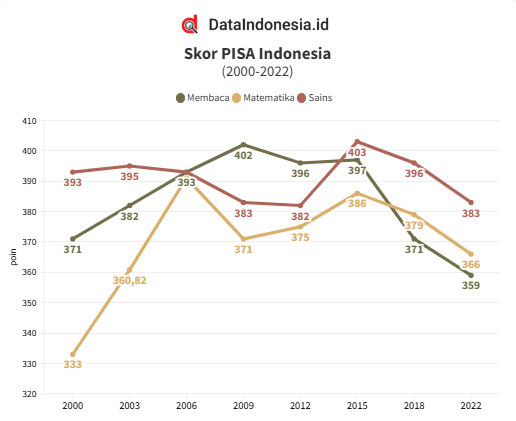


# Problem Statements
*   Berdasarkan laporan Programme for International Student Assessment (PISA) 2022 dari Organisastion untuk Kerja Sama dan Pembangunan Ekonomi (OECD), kualitas pendidikan Indonesia terpantau kembali mengalami penurunan.
*   Selain itu, keberagaman cara belajar, kebiasaan, dan latar belakang siswa juga berdampak bagi performa akademik mereka. Namun, intervensi pendidikan yang diberikan masih kurang sesuai dengan apa yang dibutuhkan oleh siswa.
*   Masalah tersebut perlu untuk diselesaikan karena membawa dampak secara langsung terhadap kualitas pendidikan di Indonesia guna mencapai Indonesia Emas 2045.
*   Hal ini dipengaruhi oleh beberapa faktor, di antaranya faktor eksternal dan internal siswa.
*   Faktor eksternal yang dapat mempengaruhi antara lain fasilitas belajar yang tersedia, aktivitas ekstrakulikuler, pendapatan orang tua, dll.
*   Faktor internal dapat dipengaruhi oleh jam tidur, tingkat motivasi,jam belajar, dll.
*   Maka dari itu, diperlukan adanya pendekatan berbasis data yang memungkinkan prediksi performa akademik dengan lebih akurat serta memberikan wawasan mendalam mengenai intervensi pendidikan yang dibutuhkan.


> Sumber Data
*   https://dataindonesia.id/pendidikan/detail/data-kualitas-pendidikan-siswa-di-indonesia-berdasarkan-hasil-pisa-2022


> Referensi
*   Abou Naaj, M., Mehdi, R., Mohamed, E. A., & Nachouki, M. (2023). Analysis of the Factors Affecting Student Performance Using a Neuro-Fuzzy Approach. MDPI. https://doi.org/10.3390/educsci13030313.
*   McKinney, J. C., & Waheed, M. (2018). Factors influencing student performance: A case study of engineering students. European Journal of Engineering Education, 43(4), 526-537.












# Goals

*   Meningkatkan kualitas pendidikan di Indonesia melalui pendekatan berbasis data sehingga setiap solusi dan keputusan yang diberikan akurat dan sesuai dengan kebutuhan siswa dalam mencapai Indonesia Emas 2045
*   Institusi ataupun guru, serta orang tua dapat memberikan intervensi pendidikan sesuai dengan kebutuhan siswa agar membawa dampak yang signifikan terhadapt performa akademik siswa
* Pemerintah dapat memberikan fasilitas pendidikan yang sesuai dengan kebutuhan masyarakat Indonesia
* Memperhatikan setiap faktor, baik eksternal dan internal yang dapat memengaruhi performa akademik siswa
* Mengembangkan model yang sesuai dalam melakukan prediksi performa akademik siswa



# Import Library

In [68]:
import pandas as pd               # Library untuk manipulasi data dan analisis
import numpy as np                # Library unutk komputasi numerikal
import matplotlib.pyplot as plt   # Library untuk visualisasi data
import seaborn as sns             # Library untuk visualisasi data statistik
import matplotlib.pyplot as pl

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
# Menambahkan algoritma
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

# Menambahkan library untuk preprocessing data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Menambahkan library untuk evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menambahkan library untuk pembagian dataset
from sklearn.model_selection import train_test_split

# Data Understanding


> Dataset
*   https://www.kaggle.com/datasets/lainguyn123/student-performance-factors?resource=download

In [71]:
# Import data
data = pd.read_csv('/content/drive/MyDrive/StudentPerformanceFactors.csv')

In [72]:
# Melihat isi data
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [73]:
# Mengetahui informasi deskripsi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [74]:
# Mengetahui jumlah data dan variabel
data.shape

(6607, 20)

# Data Preparation

In [75]:
# Melakukan pengecekan untuk data null
print(data.isnull() .sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


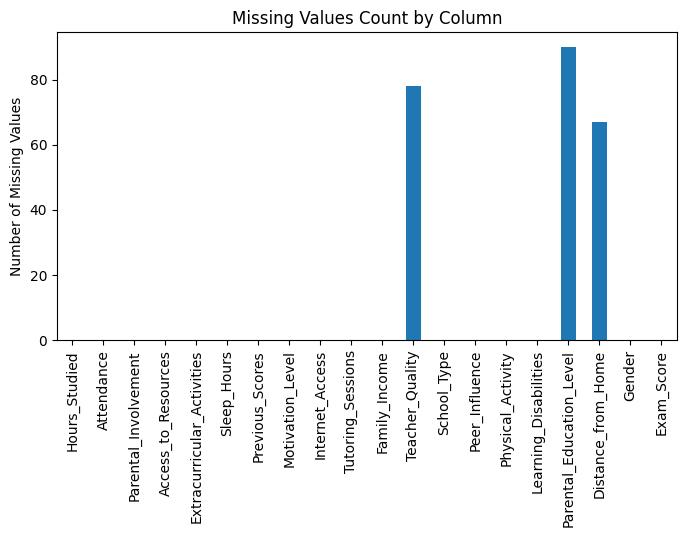

In [76]:
# Memvisualisasikan kolom yang memiliki null value
missing_data = data.isnull().sum()

# Visualisasi menggunakan diagram batang
missing_data.plot(kind='bar', figsize=(8, 4))
plt.title("Missing Values Count by Column")
plt.ylabel("Number of Missing Values")
plt.show()

In [77]:
# Memisahkan antara kolom kategorikal dan kolom numerik
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

print(numerical_cols)
print(categorical_cols)

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')
Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


> Bertujuan untuk memisahkan kolom berdasarkan tipe datanya agar bisa diterapkan metode imputasi yang sesuai.






# Imputasi

In [78]:
from sklearn.impute import SimpleImputer

# Imputasi data numerik
num_imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])

# Imputasi data kategorikal
cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

> **Apa tujuannya?**
*   Mengisi nilai kosong pada kolom numerik dengan nilai rata-rata untuk mengurangi bias akibat kehilangan data.
*   Mengisi nilai kosong pada kolom numerik dengan nilai rata-rata untuk mengurangi bias akibat kehilangan data











In [79]:
# Melakukan pengecekan untuk kolom dengan null value
print(data.isnull() .sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


> **Mengapa ini penting?**
*   Nilai kosong dapat menyebabkan kesalahan atau ketidaktepatan dalam analisis data atau pelatihan model machine learning.
*   Imputasi adalah teknik untuk menangani nilai kosong tanpa membuang data yang berharga, sehingga meningkatkan kualitas dan integritas dataset.

In [80]:
# Melakukan pengecekan adanya duplikasi data
data.duplicated().sum()

0



> **Apa tujuannya?**
*   Mengetahui apakah ada duplikasi dalam dataset.
*   Memastikan kualitas data, karena duplikasi bisa menyebabkan bias atau kesalahan dalam analisis data






# Exploratory Data Analysis (EDA)

In [81]:
# Mengambil kolom data yang telah diidentifikasi sebagai kolom kategorikal
data_categorical_cols =data[categorical_cols]

# Mengambil kolom data yang telah diidentifikasi sebagai kolom numerik
data_numerical_cols =data[numerical_cols]

# Menampilkan data kategorikal dan numerikal
print(data_categorical_cols)
print(data_numerical_cols)

     Parental_Involvement Access_to_Resources Extracurricular_Activities  \
0                     Low                High                         No   
1                     Low              Medium                         No   
2                  Medium              Medium                        Yes   
3                     Low              Medium                        Yes   
4                  Medium              Medium                        Yes   
...                   ...                 ...                        ...   
6602                 High              Medium                         No   
6603                 High              Medium                         No   
6604               Medium                 Low                        Yes   
6605                 High                High                        Yes   
6606               Medium                 Low                        Yes   

     Motivation_Level Internet_Access Family_Income Teacher_Quality  \
0               



> **Apa tujuannya?**
*   Dengan memisahkan data berdasarkan tipe kolom, kita bisa lebih mudah memahami struktur dataset
*   Data kategorikal biasanya dianalisis dengan menghitung frekuensi setiap kategori, sedangkan data numerikal biasanya dianalisis untuk statistik deskriptif seperti rata-rata, median






# Visualisasi Data

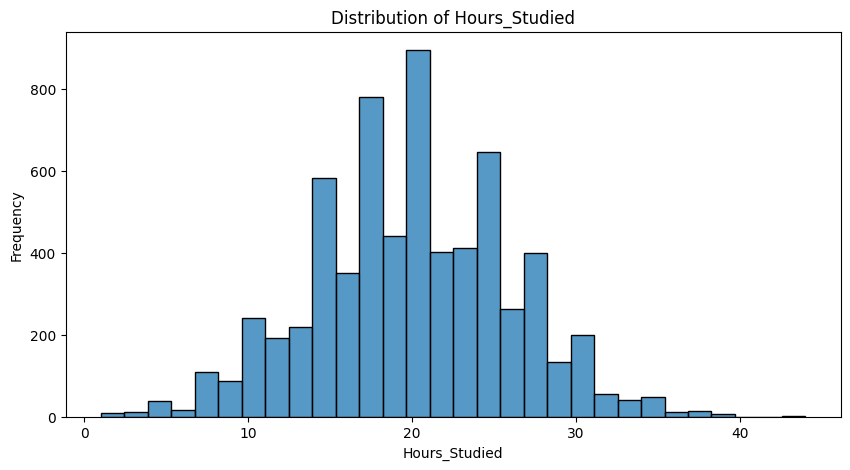

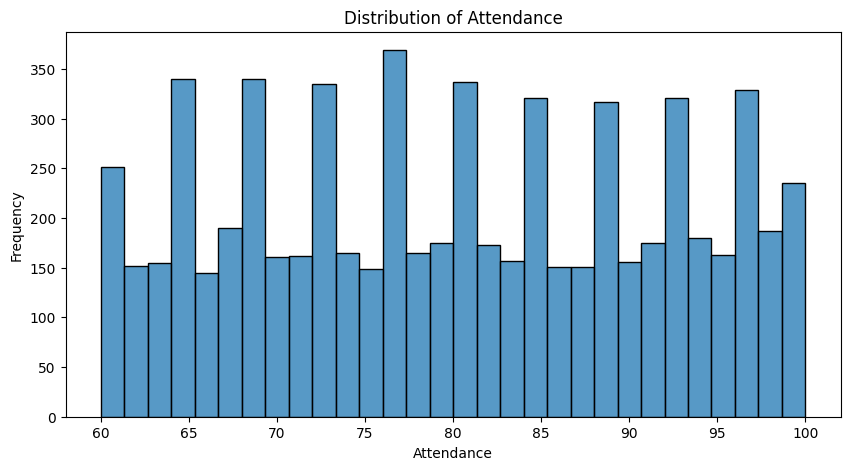

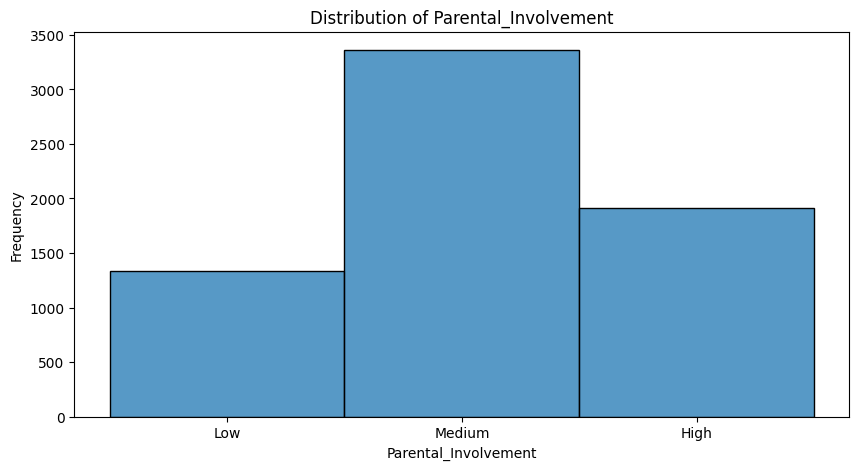

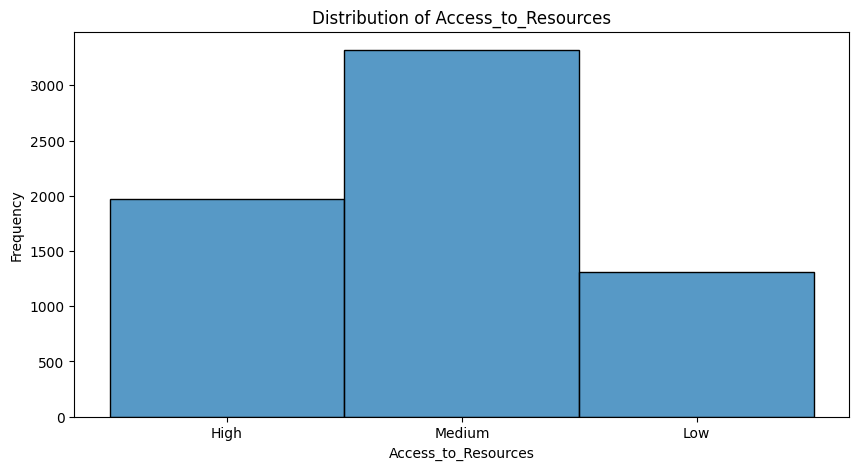

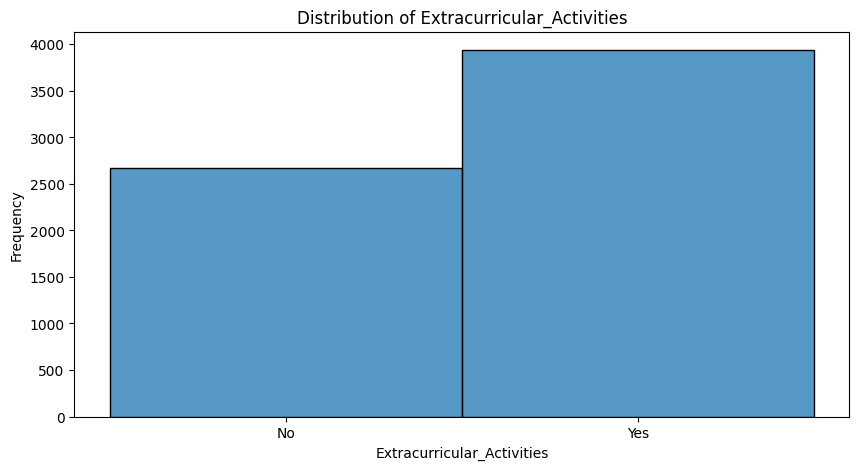

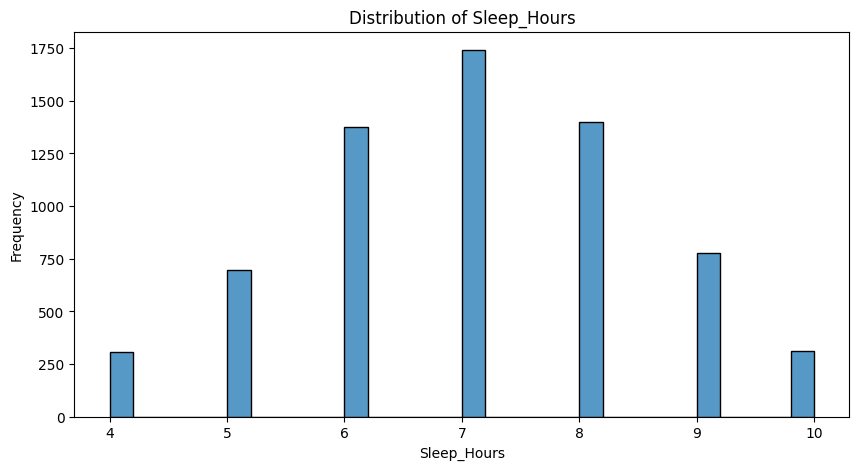

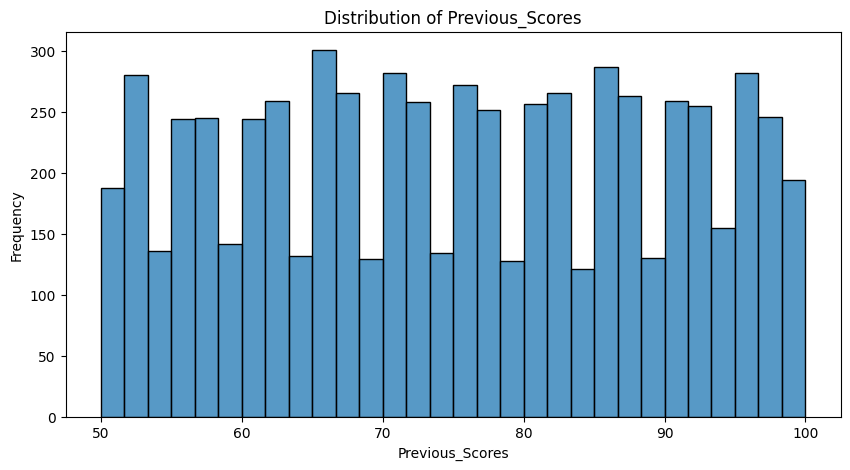

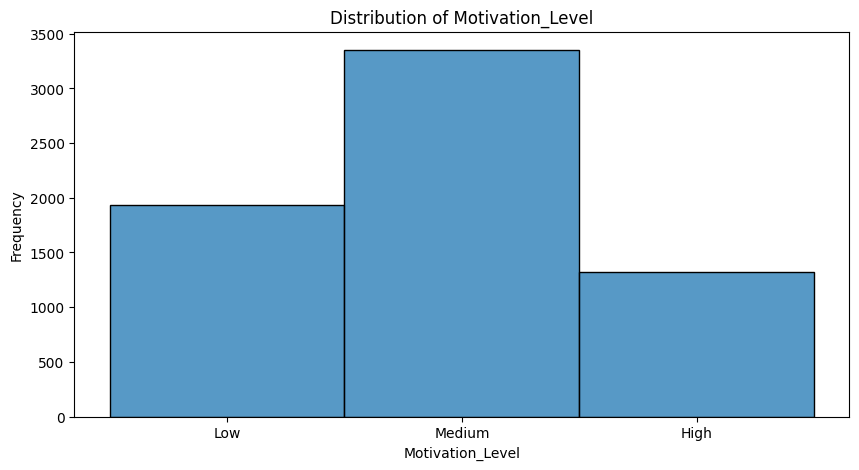

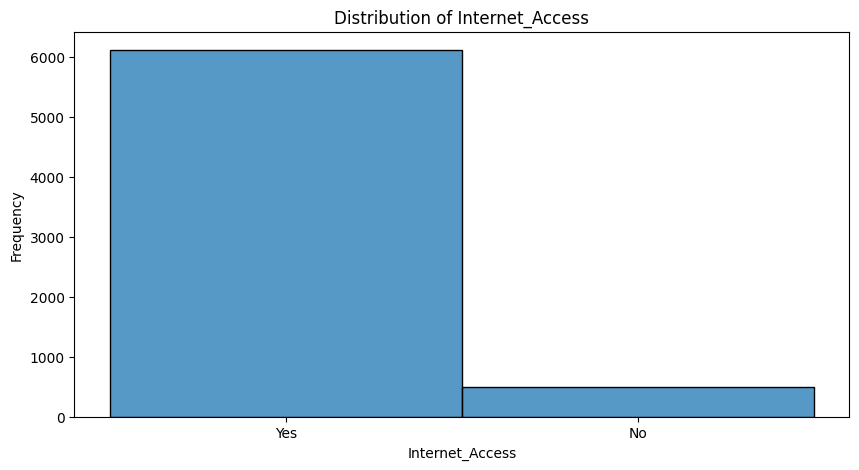

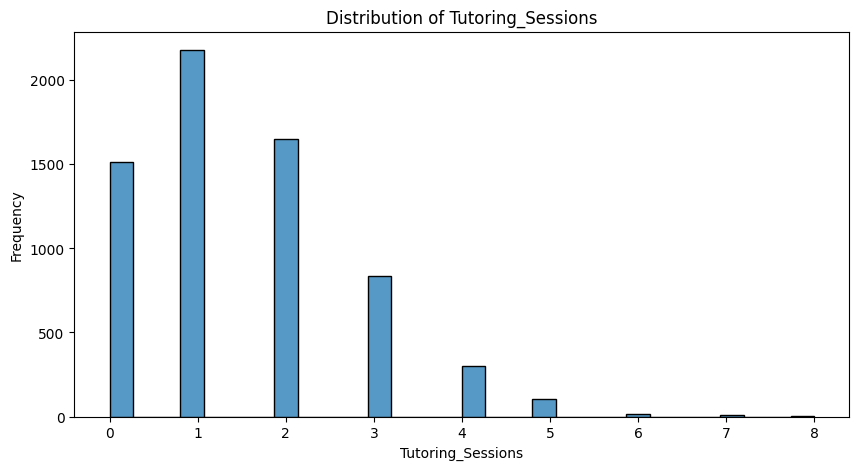

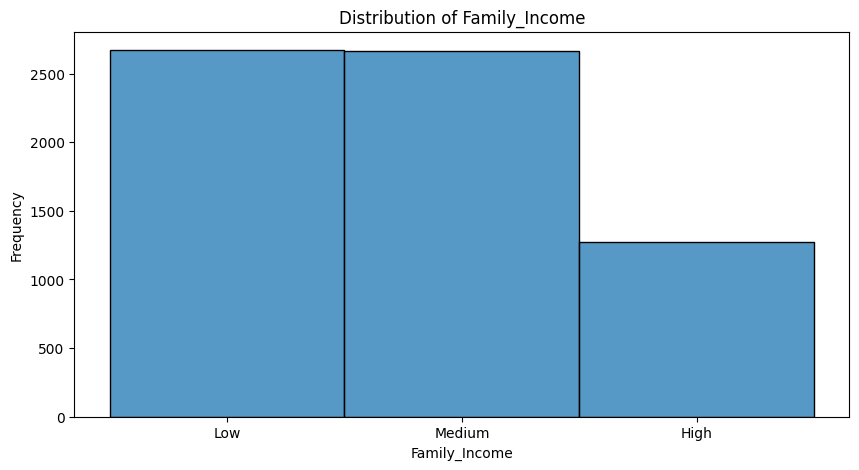

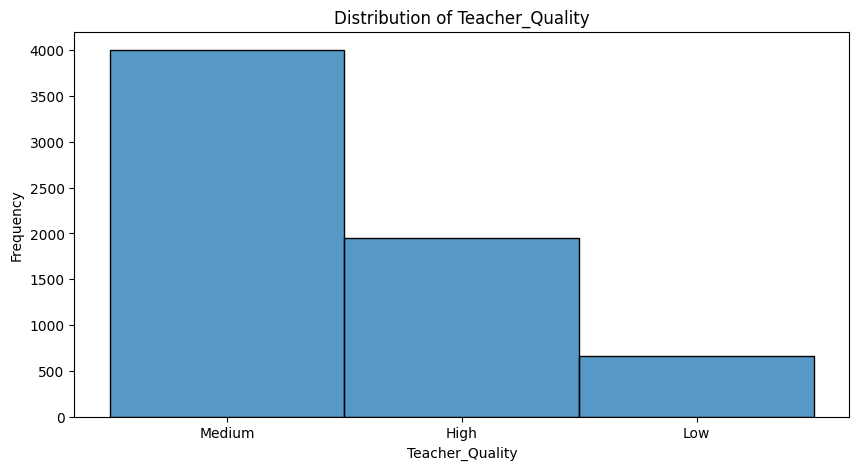

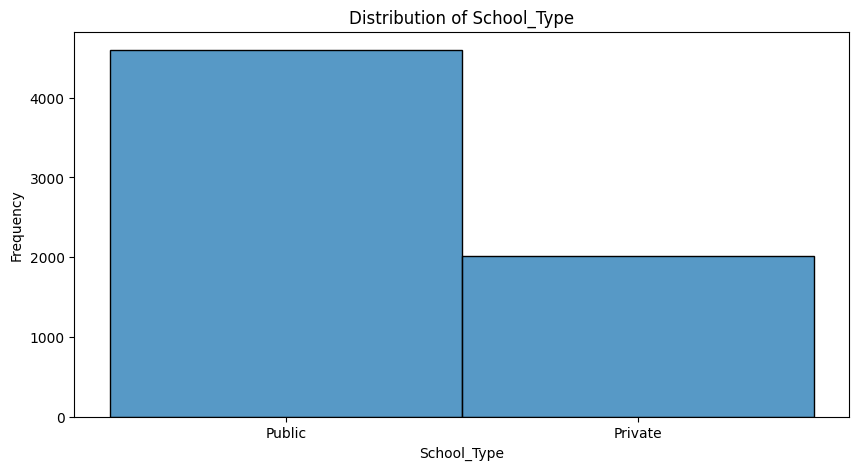

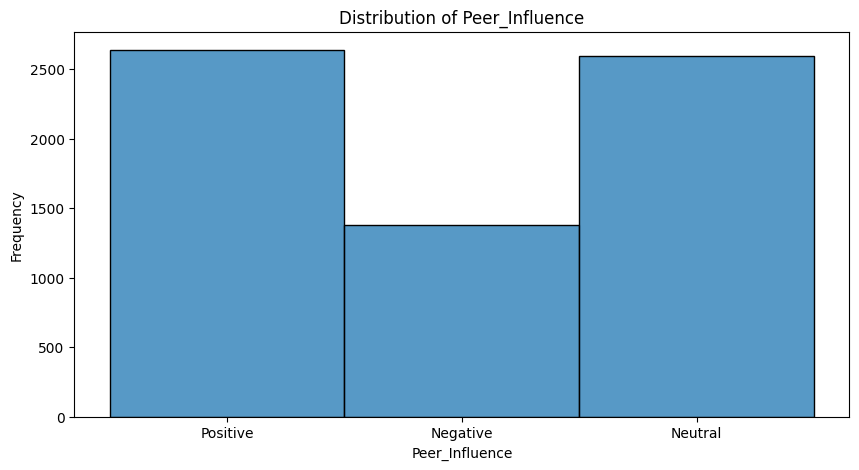

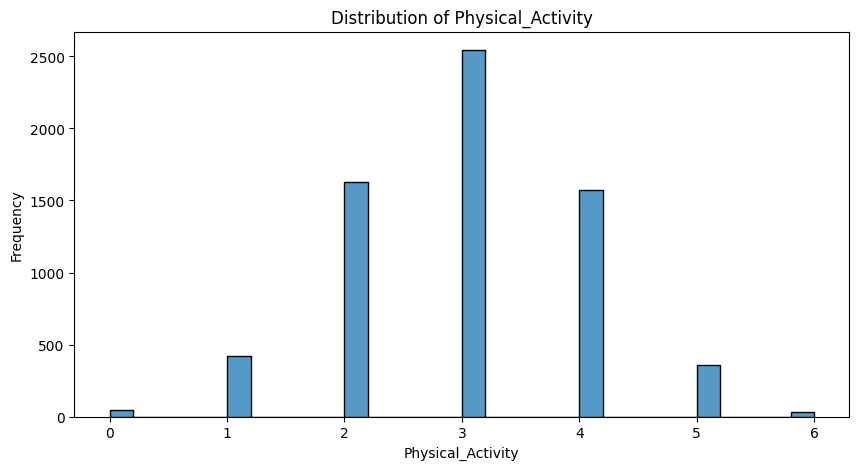

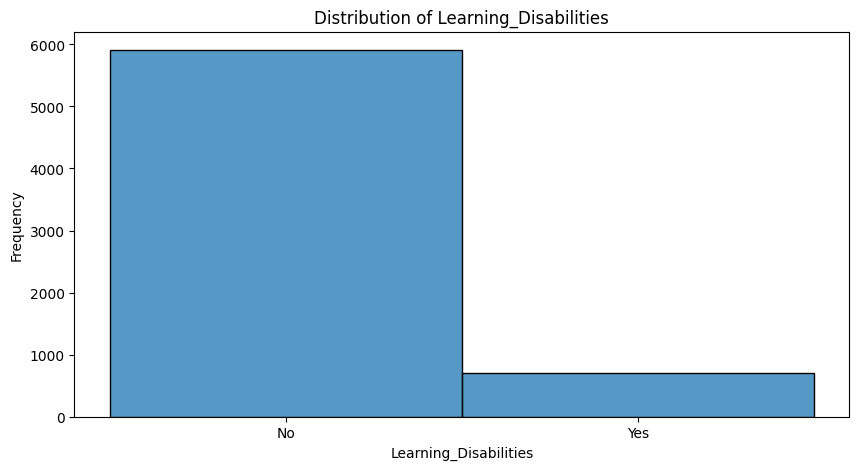

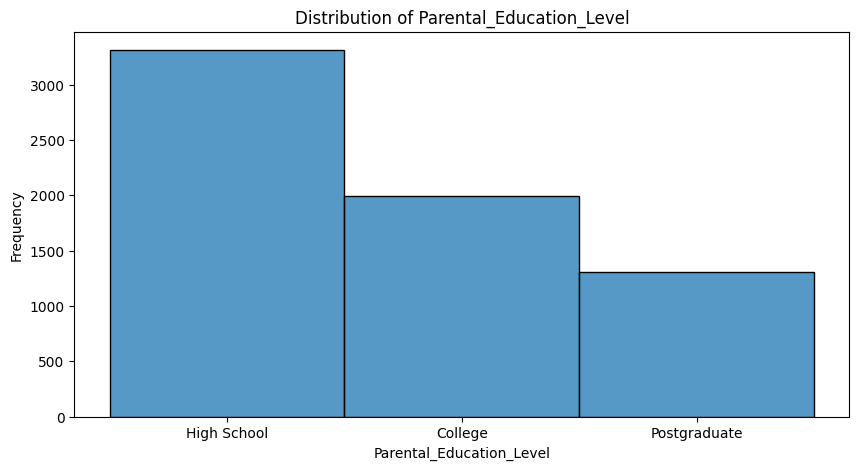

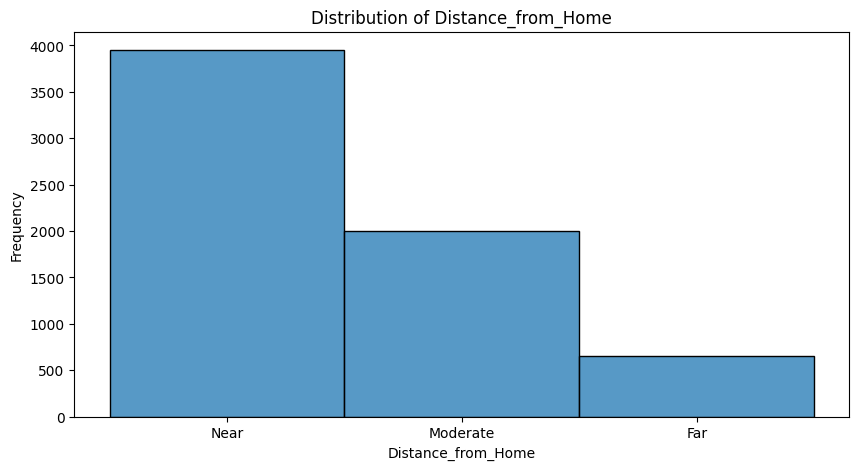

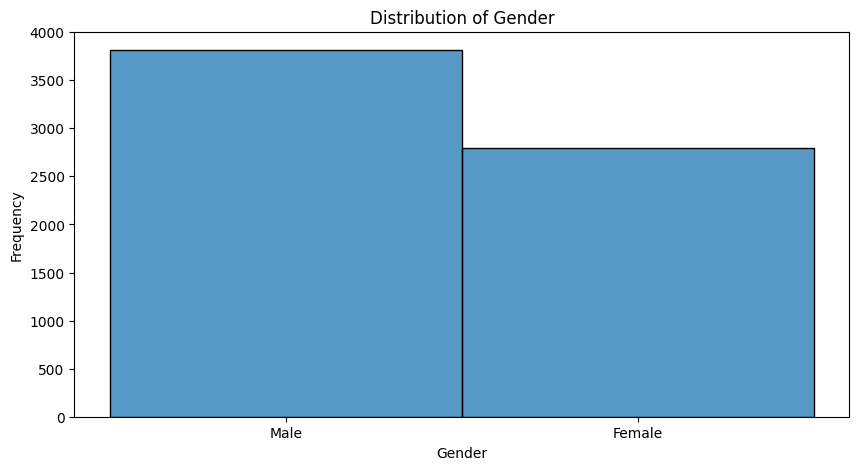

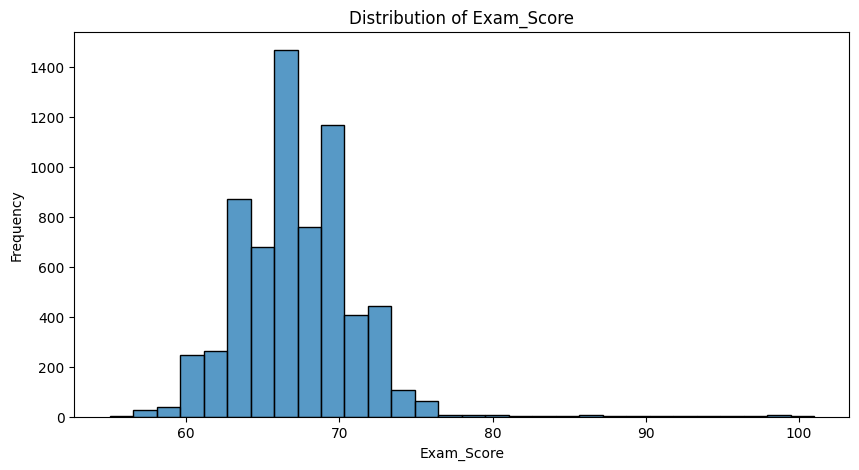

In [82]:
# Melihat distribusi data pada masing masing kolom
for column in data.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

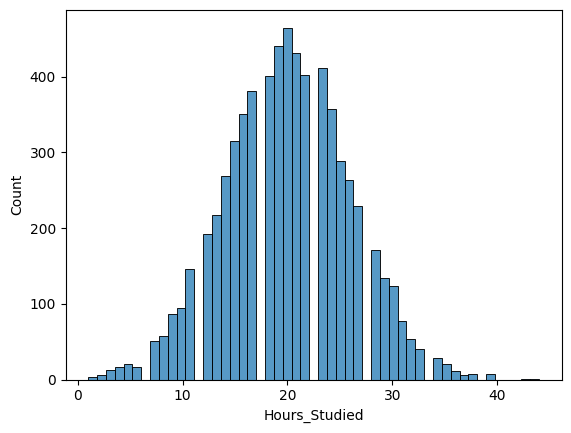

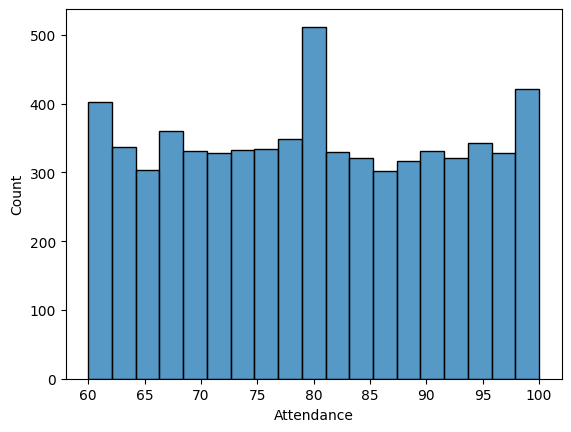

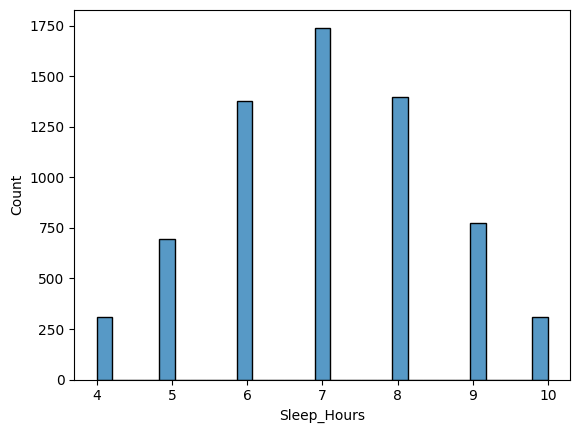

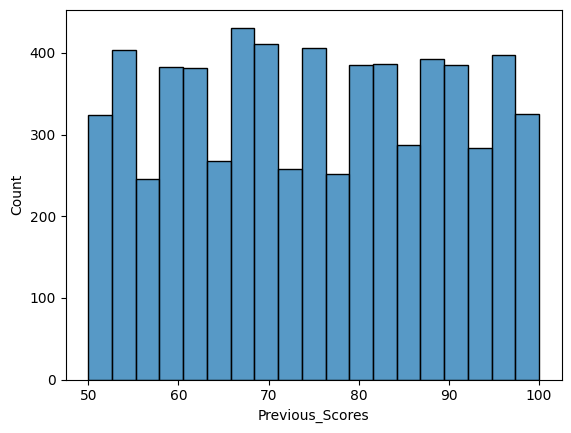

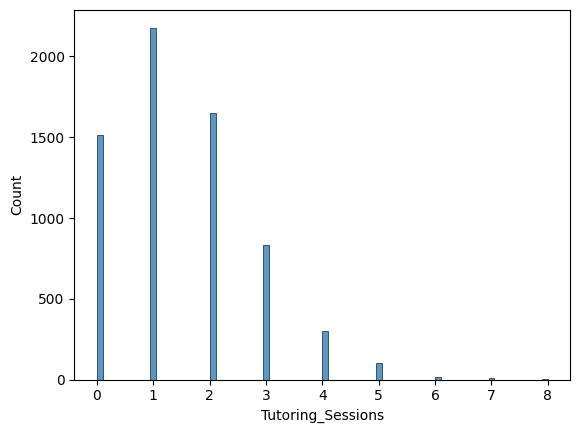

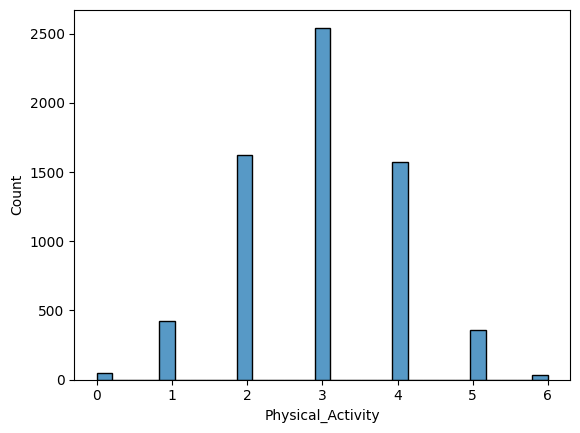

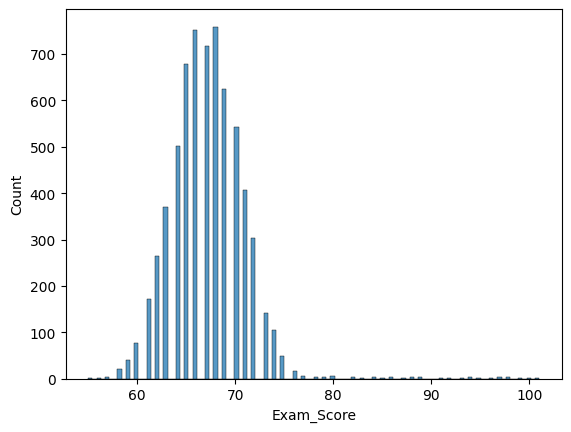

In [83]:
# Melihat Histogram untuk data numerik
for col_type in data.select_dtypes(include = "number").columns:
    sns.histplot(data = data, x = col_type)
    plt.show()

> **Apa tujuannya?**
*   Menunjukkan bagaimana nilai dalam kolom tersebar, seperti apakah data mengikuti distribusi normal, berpusat di satu nilai (unimodal), atau memiliki lebih dari satu puncak (multimodal)
*   Membantu mendeteksi nilai yang jauh berbeda dari mayoritas data (Outliers)
*   Memengaruhi pemilihan model atau metrik evaluasi. Metrik *mean* cocok untuk distribusi normal, sedangkan metrik *median* mungkin lebih representatif untuk distribusi data miring

In [84]:
# Melihat unique value pada data kategorikal
unique_values = data_categorical_cols.apply(lambda x: x.unique())
print(unique_values)

Parental_Involvement                           [Low, Medium, High]
Access_to_Resources                            [High, Medium, Low]
Extracurricular_Activities                               [No, Yes]
Motivation_Level                               [Low, Medium, High]
Internet_Access                                          [Yes, No]
Family_Income                                  [Low, Medium, High]
Teacher_Quality                                [Medium, High, Low]
School_Type                                      [Public, Private]
Peer_Influence                       [Positive, Negative, Neutral]
Learning_Disabilities                                    [No, Yes]
Parental_Education_Level      [High School, College, Postgraduate]
Distance_from_Home                           [Near, Moderate, Far]
Gender                                              [Male, Female]
dtype: object


In [85]:
print(numerical_cols)

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')


# Biverate Data Numerik

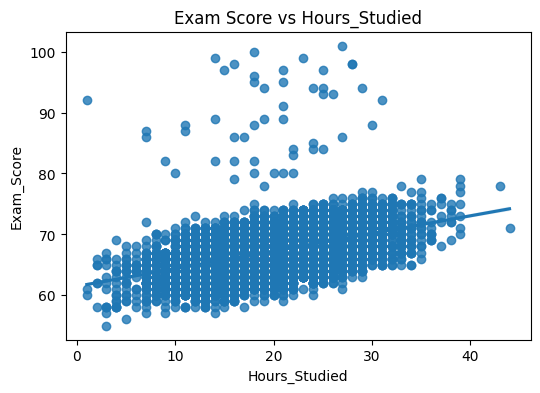

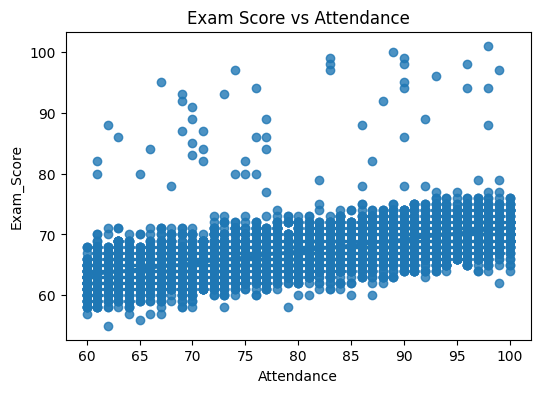

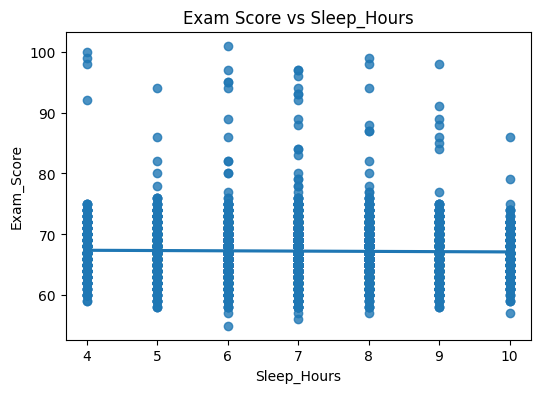

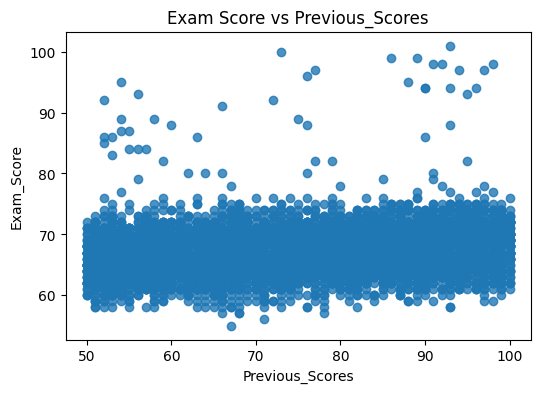

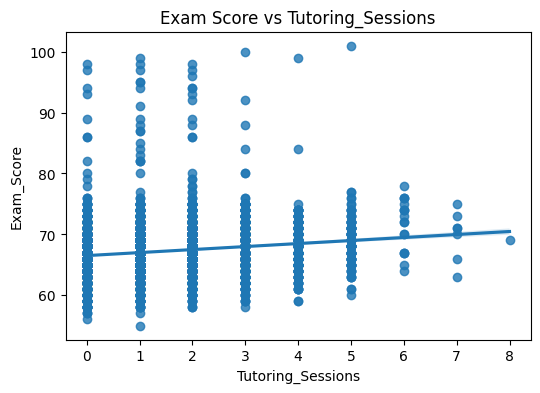

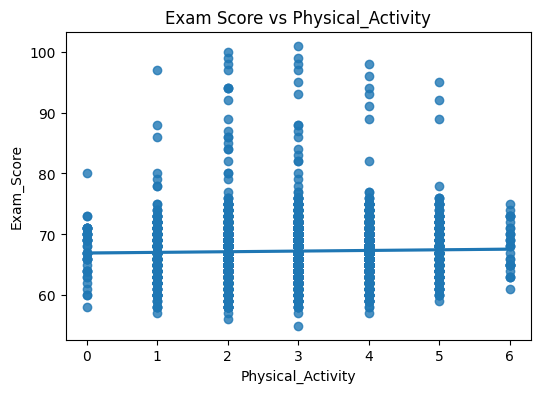

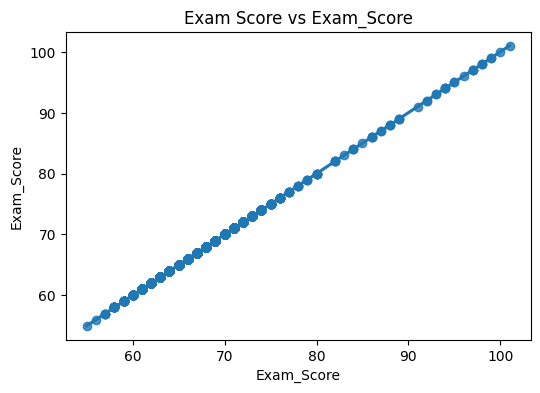

In [86]:
# Regresi Linear untuk data numerik
for var in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=var, y='Exam_Score', data=data_numerical_cols)
    plt.title(f'Exam Score vs {var}')
    plt.show()



> **Mengapa Menggunakan Regresi Linear pada Data Numerikal?**
*   Regresi linear digunakan untuk memahami hubungan linier antara variabel independen (numerikal) dan variabel dependen (target), dalam hal ini Exam_Score
*   Dengan menggunakan scatter plot dilengkapi dengan garis regresi, kita dapat mengidentifikasi apakah variabel numerikal memiliki hubungan positif, negatif, atau tidak ada hubungan dengan nilai ujian
*   Kemiringan garis regresi dan penyebaran titik memberikan indikasi kekuatan dan arah hubungan
*   Sebagai contoh, hubungan antara Hours_Studied (jam belajar) dan Exam_Score biasanya linier di mana semakin tinggi jam belajar, semakin tinggi nilai ujian.







# Box Plots Data Kategorikal

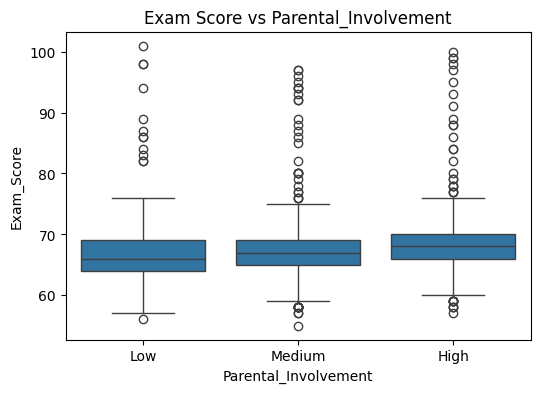

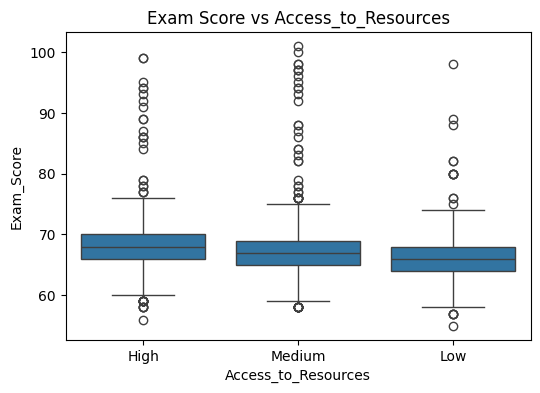

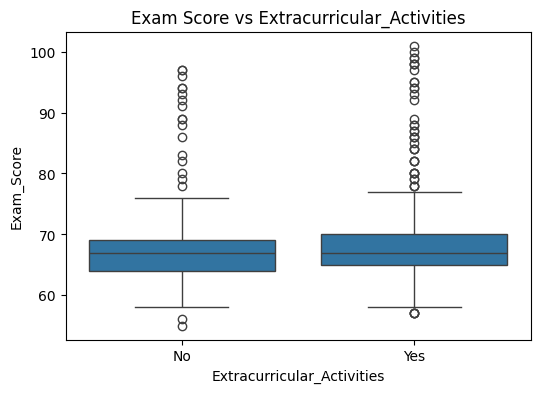

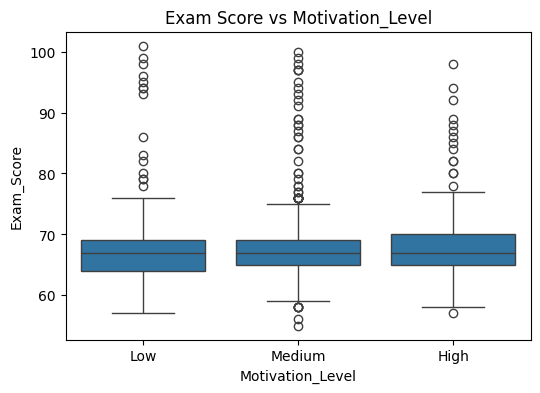

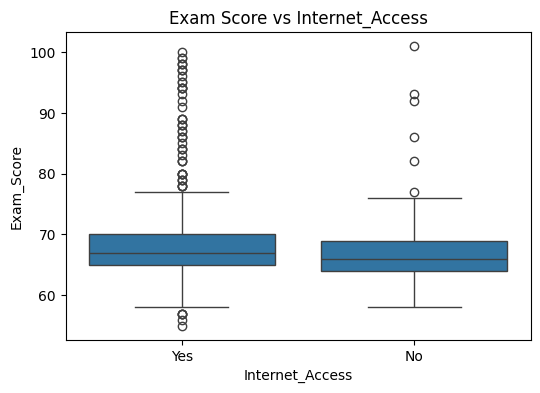

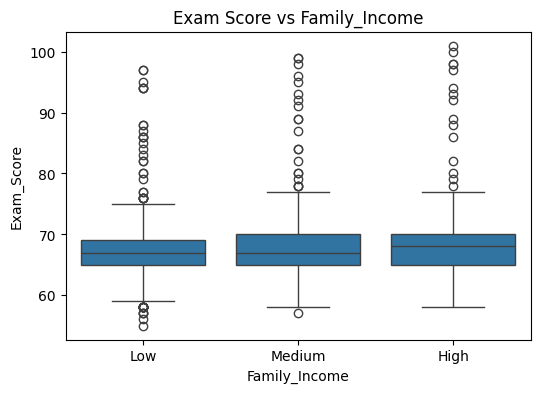

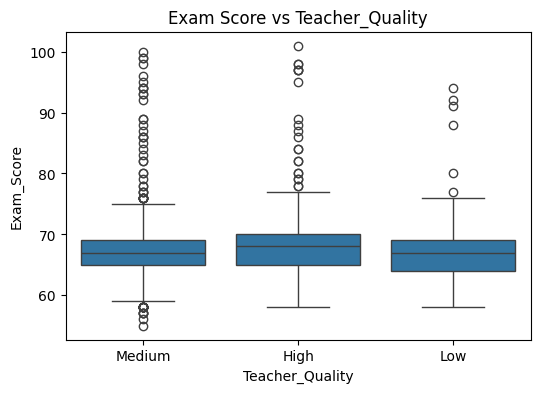

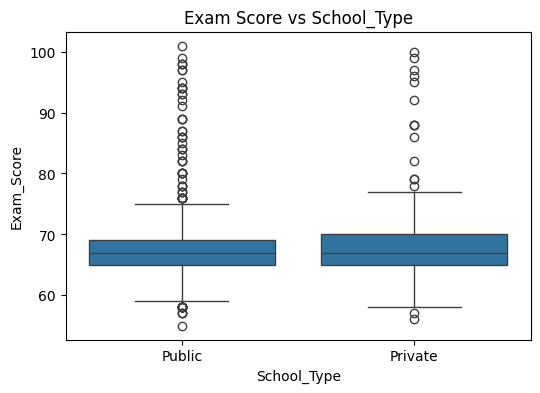

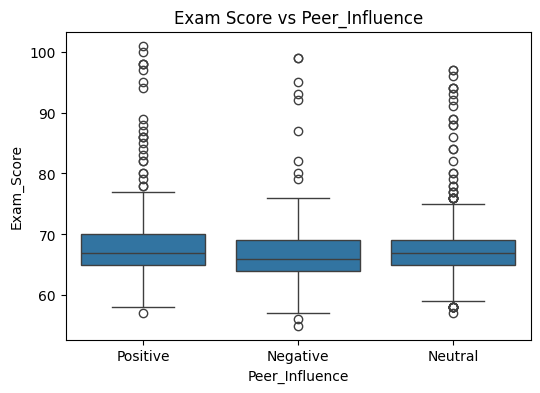

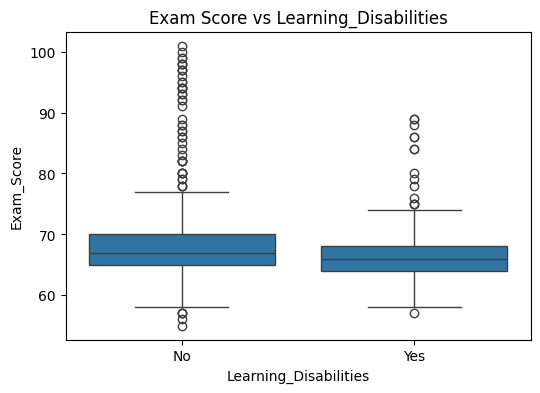

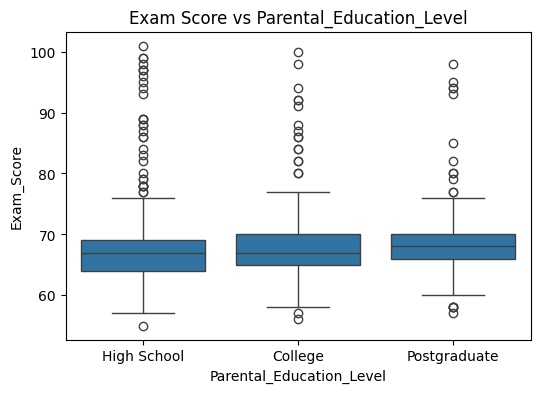

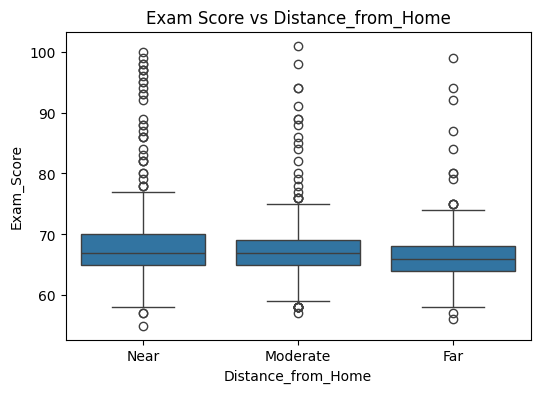

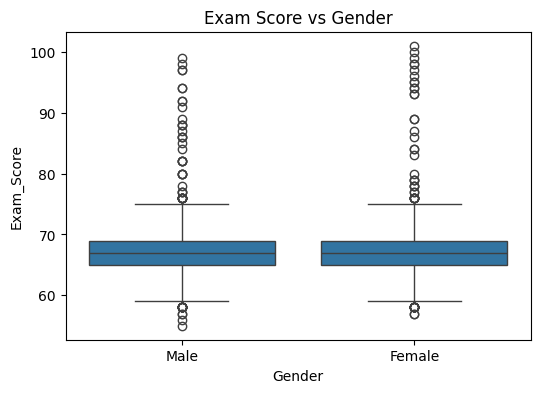

In [87]:
# Box Plots untuk data kategorikal
for var in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=var, y='Exam_Score', data=data)
    plt.title(f'Exam Score vs {var}')
    plt.show()

> **Mengapa Menggunakan Box Plot pada Data Kategorikal?**
*   Box plot digunakan untuk memahami distribusi nilai Exam_Score di antara kategori dalam variabel kategorikal.
*   Box plot memperlihatkan median, quartile, dan nilai ekstrem untuk setiap kategori
*   Nilai ekstrem di luar whiskers box plot membantu mendeteksi kelompok siswa yang performanya sangat berbeda
*   Sebagai contoh, siswa dengan orang tua berpendidikan tinggi mungkin memiliki nilai yang lebih tinggi secara rata-rata



> **Mengapa digunakan 2 macam visualisasi data di atas?**
*   **Regresi Linear** memberikan informasi tentang pola hubungan linier antar variabel numerikal dengan Exam_Score.
*   **Box Plot** membantu memahami perbedaan distribusi nilai Exam_Score di antara kategori variabel kategorikal.
*   Kedua metode ini bersama-sama memberikan wawasan awal yang penting dalam analisis data dan pemodelan.





# Label Encoding

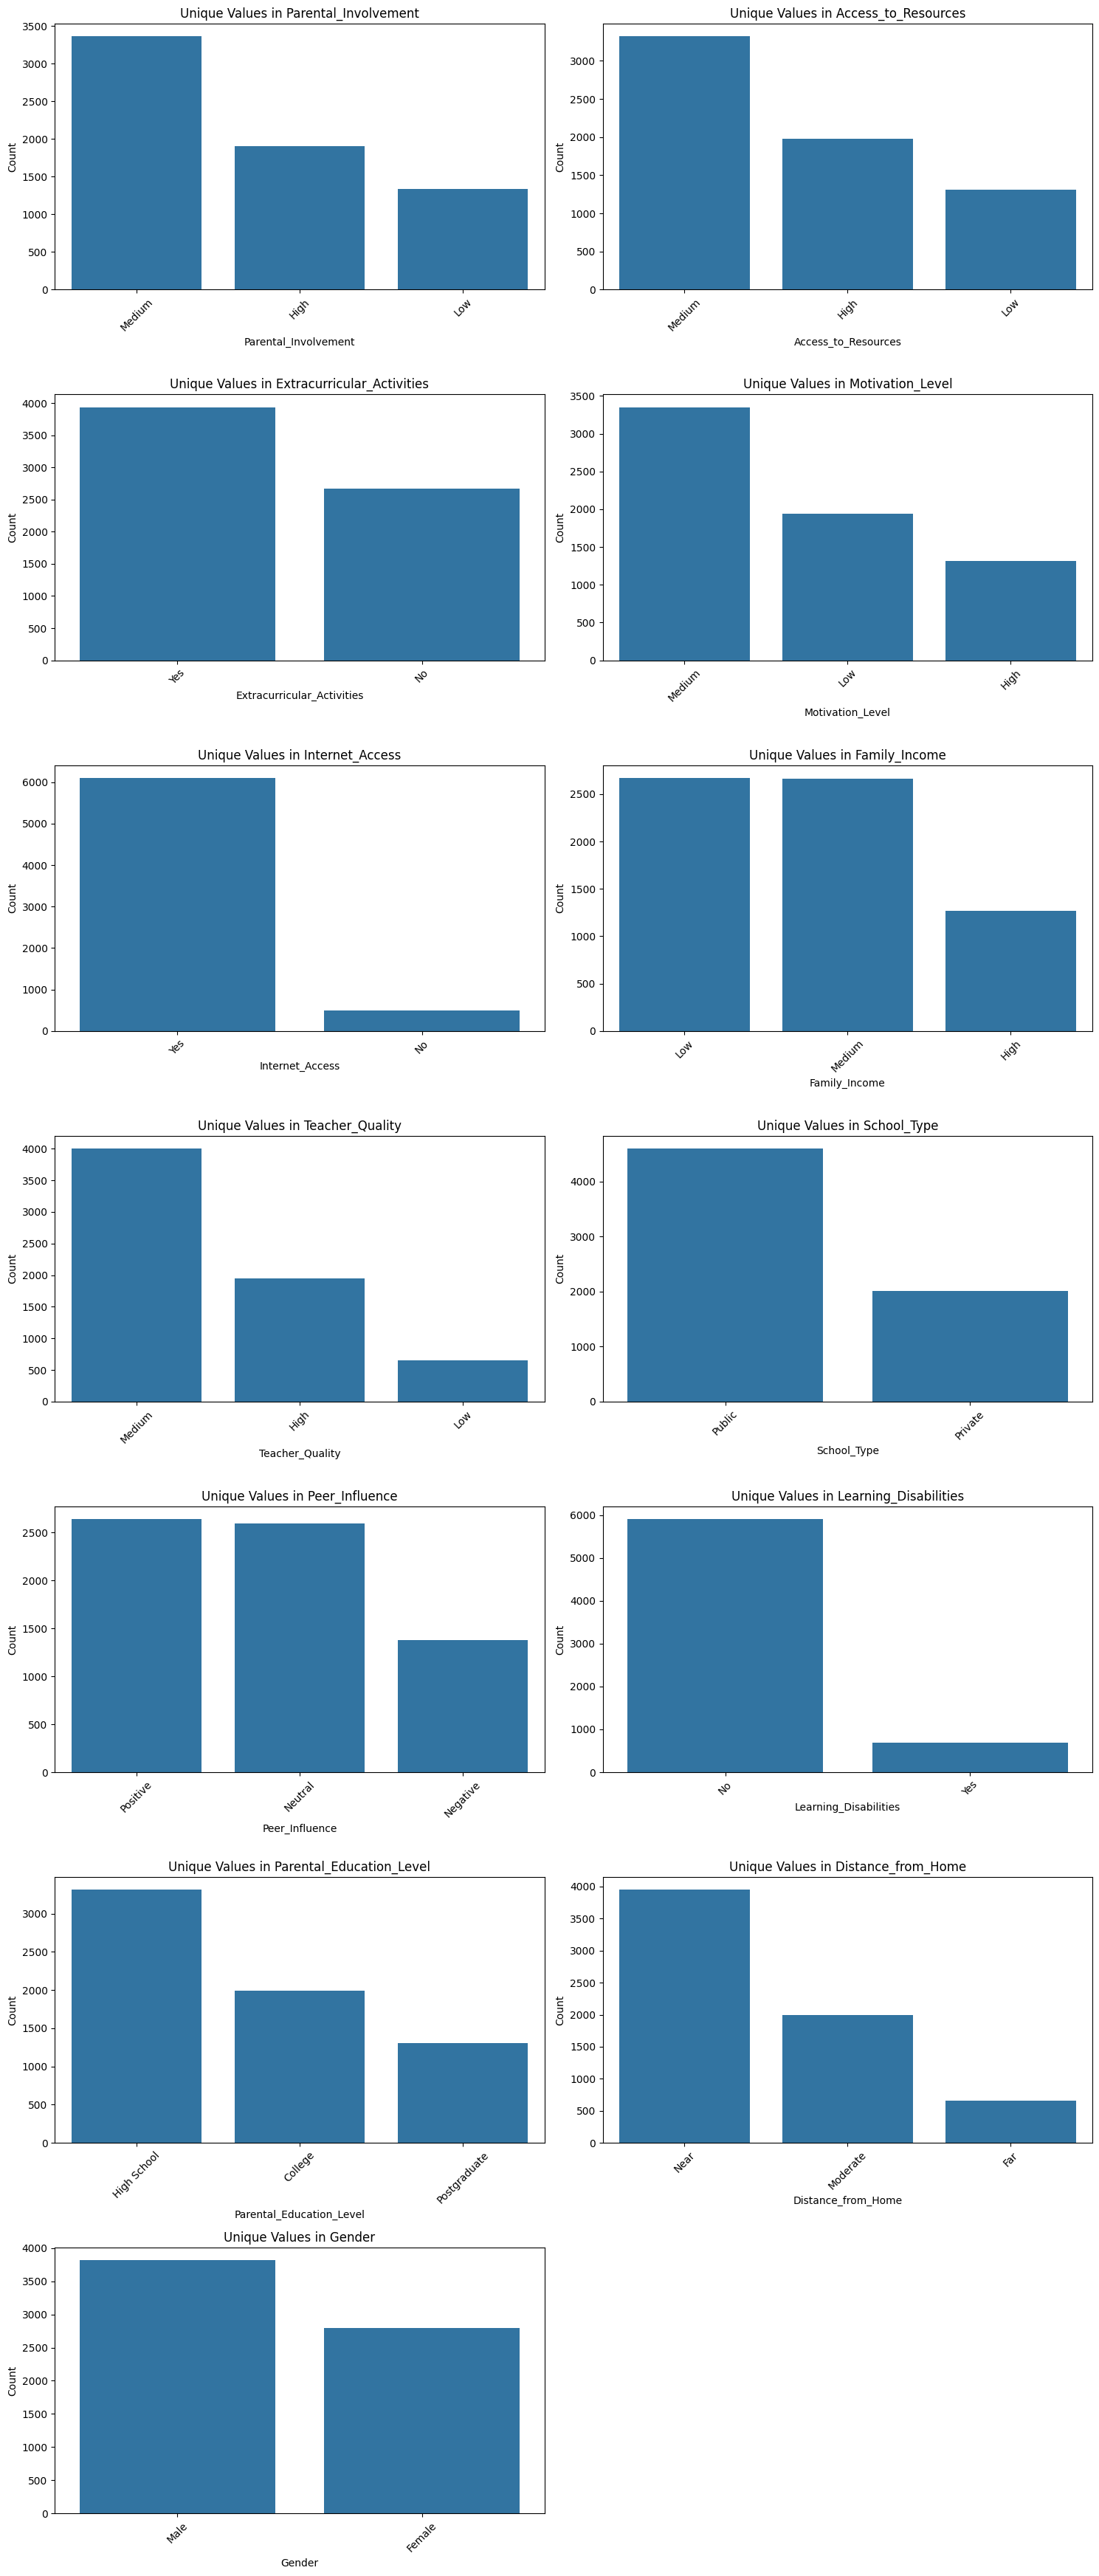

In [88]:
# Membuat visualisasi distribusi data pada kolom kategorikal
num_columns = len(data_categorical_cols.columns)
plt.figure(figsize=(15, 5 * (num_columns // 2 + num_columns % 2)))

# Membuat grafik untuk setiap kolom dan mem-plot nilai unik
for i, column in enumerate(data_categorical_cols.columns):
    plt.subplot((num_columns // 2 + num_columns % 2), 2, i + 1)  # Membuat subplots
    unique_values = data_categorical_cols[column].value_counts()  # Menghitung nilai unik
    sns.barplot(x=unique_values.index, y=unique_values.values)  # Membuat grafik menggunakan bar plot
    # Memberi label pada grafik
    plt.title(f'Unique Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# Mengatur tata letak
plt.tight_layout()
plt.show()

> **Apa maksud langkah di atas?**
*   Membuat visualisasi distribusi data untuk setiap kolom dengan tipe data kategorikal yang ada dalam dataset data_categorical_cols. Hal ini dilakukan untuk memahami jumlah kemunculan (frekuensi) setiap kategori dalam masing-masing kolom.

> **Apa tujuannya?**
*   Mengidentifikasi data kategorikal yang tidak seimbang karena dapat memengaruhi pelatihan model machine learning.
*   Distribusi ini dapat menentukan apakah perlu dilakukan tindakan seperti encoding, resampling, atau pengelompokan ulang kategori

In [89]:
print(categorical_cols)

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


In [90]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Mengaplikasikan LabelEncoder untuk setiap kolom data kategorikal
for column in categorical_cols:
    data[f'{column}_encoded'] = label_encoder.fit_transform(data[column])

In [91]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Motivation_Level_encoded,Internet_Access_encoded,Family_Income_encoded,Teacher_Quality_encoded,School_Type_encoded,Peer_Influence_encoded,Learning_Disabilities_encoded,Parental_Education_Level_encoded,Distance_from_Home_encoded,Gender_encoded
0,23.0,84.0,Low,High,No,7.0,73.0,Low,Yes,0.0,...,1,1,1,2,1,2,0,1,2,1
1,19.0,64.0,Low,Medium,No,8.0,59.0,Low,Yes,2.0,...,1,1,2,2,1,0,0,0,1,0
2,24.0,98.0,Medium,Medium,Yes,7.0,91.0,Medium,Yes,2.0,...,2,1,2,2,1,1,0,2,2,1
3,29.0,89.0,Low,Medium,Yes,8.0,98.0,Medium,Yes,1.0,...,2,1,2,2,1,0,0,1,1,1
4,19.0,92.0,Medium,Medium,Yes,6.0,65.0,Medium,Yes,3.0,...,2,1,2,0,1,1,0,0,2,0


> **Apa tujuannya?**
*   Bertujuan untuk mengubah data kategorikal menjadi bentuk numerik menggunakan LabelEncoder dari pustaka scikit-learn. Setiap kategori unik dalam kolom kategorikal akan diberi label numerik
*   Data harus dikonversi menjadi angka sebelum diproses oleh algoritma Machine Learning menjadi model
*   Distribusi ini dapat menentukan apakah perlu dilakukan tindakan seperti encoding, resampling, atau pengelompokan ulang kategori

# Scaler

In [92]:
# Mengubah skala data pada kolom tertentu menggunakan Standard Scaler dan MinMax Scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Mengaplikasikan StandardScaler pada variabel yang mempunyai distribusi normal
scaler = StandardScaler()

data[['Hours_Studied', 'Sleep_Hours', 'Physical_Activity']] = scaler.fit_transform(
    data[['Hours_Studied', 'Sleep_Hours', 'Physical_Activity']]
)

# Mengaplikasikan MinMaxScaler untuk data berskala antara 0, 1 secara default
min_max_scaler = MinMaxScaler()

data[['Attendance', 'Previous_Scores']] = min_max_scaler.fit_transform(
    data[['Attendance', 'Previous_Scores']]
)

> **Apa maksud langkah di atas?**
*   Mengubah skala (scaling) data numerik pada kolom tertentu menggunakan dua teknik yaitu StandardScaler dan MinMaxScaler. Hal ini dilakukan untuk memastikan data berada dalam skala yang teratur sebelum diolah ke dalam model Machine Learning.

> **StandardScaler**
*   Mengubah data sehingga memiliki distribusi dengan rata-rata (mean) 0 dan standar deviasi (standard deviation) 1.
*   Rumus Transformasi
*   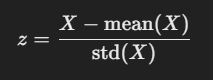

> **MinMaxScaler**
*   Mengubah data ke dalam skala tertentu, biasanya antara 0 dan 1 (default).
*   Rumus Transformasi
*   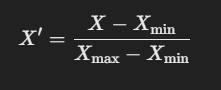

> **Apa tujuannya?**
*   Beberapa algoritma (misalnya SVM dan KNN) sensitif terhadap skala data. Scaling membantu meningkatkan akurasi dan efisiensi model
*   Data dengan skala besar (misalnya, 1.000.000 vs. 0,1) dapat menyebabkan model memberikan bobot yang tidak proporsional terhadap variabel berskala besar. Scaling memastikan bahwa setiap variabel memiliki pengaruh yang setara

In [93]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Motivation_Level_encoded,Internet_Access_encoded,Family_Income_encoded,Teacher_Quality_encoded,School_Type_encoded,Peer_Influence_encoded,Learning_Disabilities_encoded,Parental_Education_Level_encoded,Distance_from_Home_encoded,Gender_encoded
0,0.504942,0.600,Low,High,No,-0.019796,0.46,Low,Yes,0.0,...,1,1,1,2,1,2,0,1,2,1
1,-0.162822,0.100,Low,Medium,No,0.661399,0.18,Low,Yes,2.0,...,1,1,2,2,1,0,0,0,1,0
2,0.671882,0.950,Medium,Medium,Yes,-0.019796,0.82,Medium,Yes,2.0,...,2,1,2,2,1,1,0,2,2,1
3,1.506587,0.725,Low,Medium,Yes,0.661399,0.96,Medium,Yes,1.0,...,2,1,2,2,1,0,0,1,1,1
4,-0.162822,0.800,Medium,Medium,Yes,-0.700990,0.30,Medium,Yes,3.0,...,2,1,2,0,1,1,0,0,2,0


In [94]:
# Melihat tipe data pada data setelah di transformasi
data.dtypes

,0
Hours_Studied,float64
Attendance,float64
Parental_Involvement,object
Access_to_Resources,object
Extracurricular_Activities,object
Sleep_Hours,float64
Previous_Scores,float64
Motivation_Level,object
Internet_Access,object
Tutoring_Sessions,float64


# Feature Engineering

In [95]:
# Memilih kolom yang berisi data numerik
numerical_all_colslist = data.select_dtypes(include=['float64', 'int64','int32']).columns

# Membuat subset data
numerical_all_cols = data[numerical_all_colslist]

# Menampilkan lima baris pertama
numerical_all_cols.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_encoded,Access_to_Resources_encoded,Extracurricular_Activities_encoded,Motivation_Level_encoded,Internet_Access_encoded,Family_Income_encoded,Teacher_Quality_encoded,School_Type_encoded,Peer_Influence_encoded,Learning_Disabilities_encoded,Parental_Education_Level_encoded,Distance_from_Home_encoded,Gender_encoded
0,0.504942,0.600,-0.019796,0.46,0.0,0.031411,67.0,1,0,0,1,1,1,2,1,2,0,1,2,1
1,-0.162822,0.100,0.661399,0.18,2.0,1.001199,61.0,1,2,0,1,1,2,2,1,0,0,0,1,0
2,0.671882,0.950,-0.019796,0.82,2.0,1.001199,74.0,2,2,1,2,1,2,2,1,1,0,2,2,1
3,1.506587,0.725,0.661399,0.96,1.0,1.001199,71.0,1,2,1,2,1,2,2,1,0,0,1,1,1
4,-0.162822,0.800,-0.700990,0.30,3.0,1.001199,70.0,2,2,1,2,1,2,0,1,1,0,0,2,0


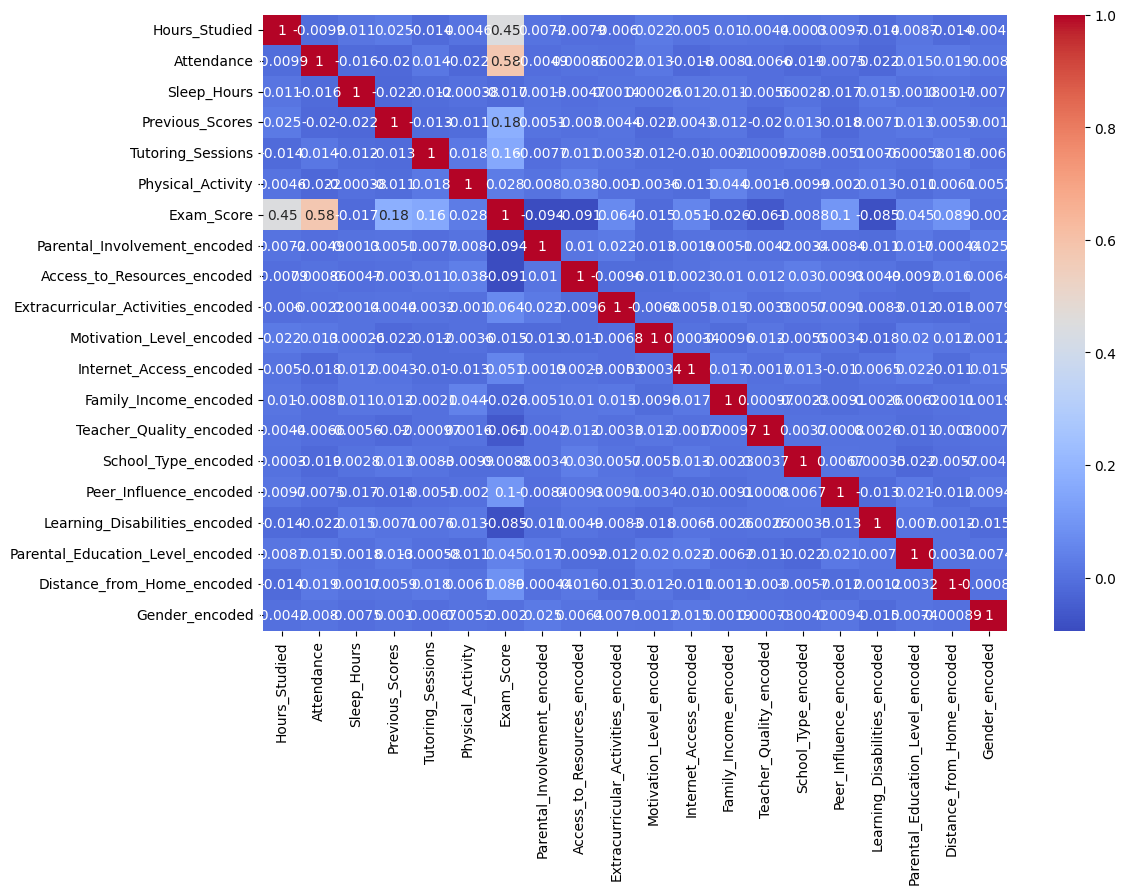

In [96]:
# Menggunakan Correlation Matrix antar kolom
corr_matrix = numerical_all_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



>



> **Apa tujuannya?**
*   Menghitung matriks korelasi antar kolom numerik di dataset.
*   Korelasi mengukur sejauh mana dua variabel numerik berkaitan secara linear, dengan nilai antara -1 (hubungan negatif sempurna) hingga +1 (hubungan positif sempurna).

In [97]:
# Menghapus kolom 'Sleep_Hours' dan 'Physical_Activity' karena memiliki korelasi yang lemah pada performa ujian siswa
data_numerical_all_cols = numerical_all_cols.drop(['Sleep_Hours', 'Physical_Activity'], axis=1)
data_numerical_all_cols.head()

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Exam_Score,Parental_Involvement_encoded,Access_to_Resources_encoded,Extracurricular_Activities_encoded,Motivation_Level_encoded,Internet_Access_encoded,Family_Income_encoded,Teacher_Quality_encoded,School_Type_encoded,Peer_Influence_encoded,Learning_Disabilities_encoded,Parental_Education_Level_encoded,Distance_from_Home_encoded,Gender_encoded
0,0.504942,0.600,0.46,0.0,67.0,1,0,0,1,1,1,2,1,2,0,1,2,1
1,-0.162822,0.100,0.18,2.0,61.0,1,2,0,1,1,2,2,1,0,0,0,1,0
2,0.671882,0.950,0.82,2.0,74.0,2,2,1,2,1,2,2,1,1,0,2,2,1
3,1.506587,0.725,0.96,1.0,71.0,1,2,1,2,1,2,2,1,0,0,1,1,1
4,-0.162822,0.800,0.30,3.0,70.0,2,2,1,2,1,2,0,1,1,0,0,2,0


Perbedaan pada data numerikal setelah dilakukan penghapusan kolom dengan korelasi lemah

In [98]:
numerical_all_cols.shape

(6607, 20)

In [99]:
data_numerical_all_cols.shape

(6607, 18)

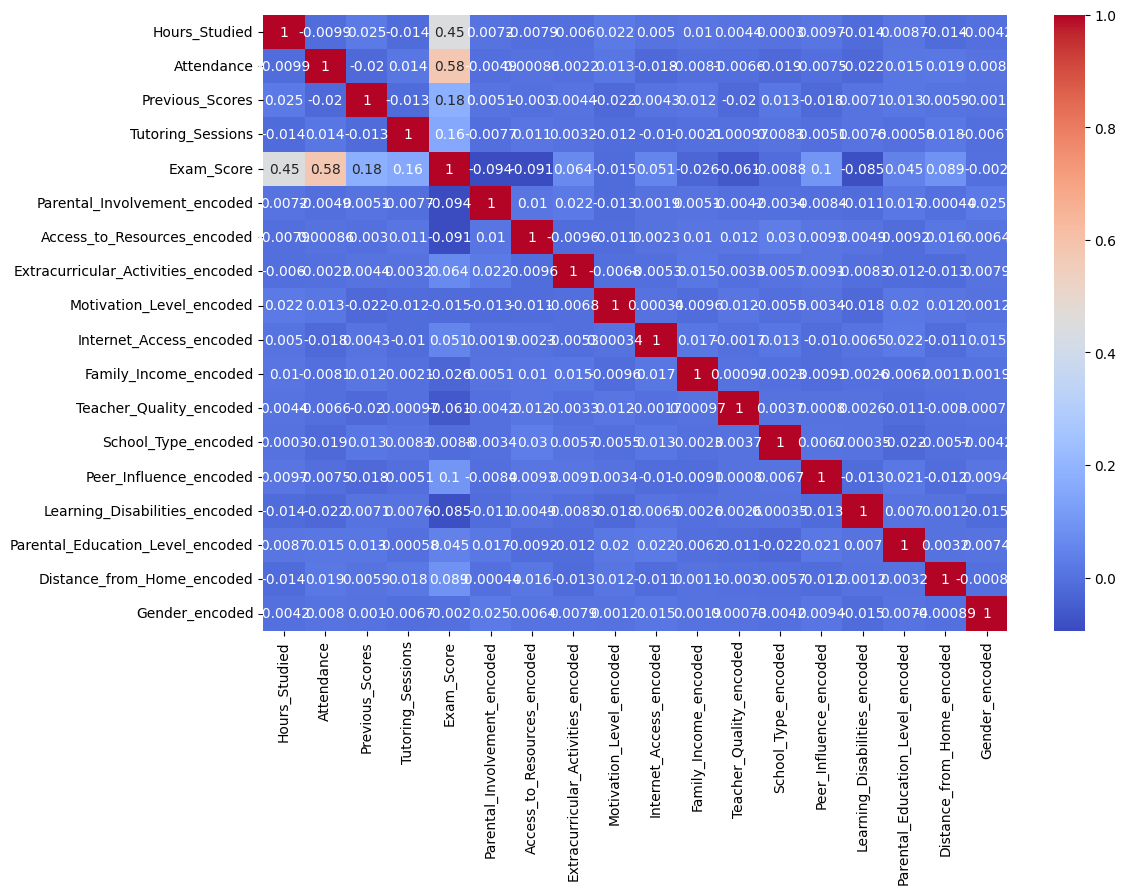

In [100]:
corr_matrix = data_numerical_all_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [101]:
# Menghapus fitur yang kurang penting
data_numerical_all_cols_Gender = numerical_all_cols.drop(['Gender_encoded', 'Family_Income_encoded','Learning_Disabilities_encoded', 'Internet_Access_encoded'], axis=1)
data_numerical_all_cols_Gender.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_encoded,Access_to_Resources_encoded,Extracurricular_Activities_encoded,Motivation_Level_encoded,Teacher_Quality_encoded,School_Type_encoded,Peer_Influence_encoded,Parental_Education_Level_encoded,Distance_from_Home_encoded
0,0.504942,0.600,-0.019796,0.46,0.0,0.031411,67.0,1,0,0,1,2,1,2,1,2
1,-0.162822,0.100,0.661399,0.18,2.0,1.001199,61.0,1,2,0,1,2,1,0,0,1
2,0.671882,0.950,-0.019796,0.82,2.0,1.001199,74.0,2,2,1,2,2,1,1,2,2
3,1.506587,0.725,0.661399,0.96,1.0,1.001199,71.0,1,2,1,2,2,1,0,1,1
4,-0.162822,0.800,-0.700990,0.30,3.0,1.001199,70.0,2,2,1,2,0,1,1,0,2


In [102]:
final_data = data_numerical_all_cols_Gender

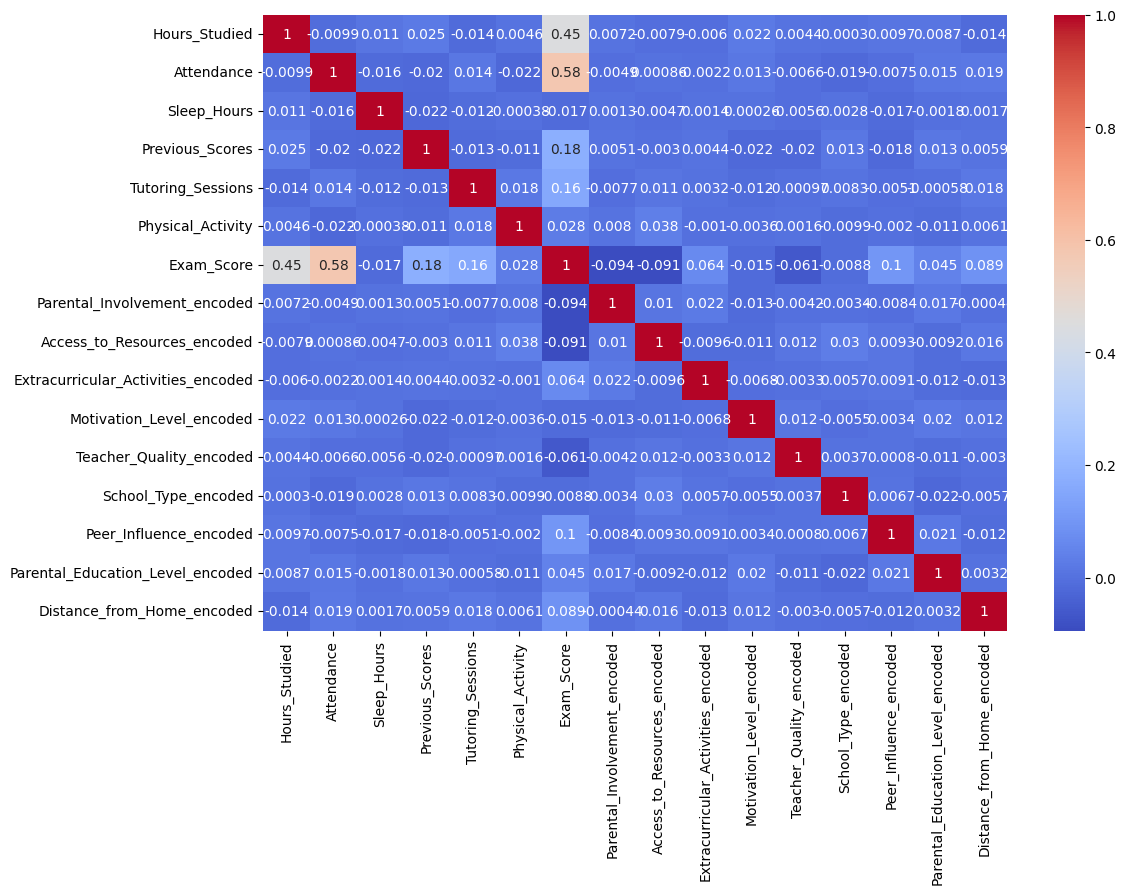

In [103]:
corr_matrix = data_numerical_all_cols_Gender.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

> **Apa tujuannya?**
*   Menyederhanakan dataset sehingga hanya berisi variabel yang penting
*   Menghindari analisis terhadap variabel yang dapat mendistorsi hasil, seperti kolom yang tidak numerik atau tidak relevan untuk analisis korelasi.
*   Membantu merancang model machine learning yang lebih optimal dengan hanya menggunakan variabel dengan korelasi yang signifikan terhadap target

# Patterns Recognition

In [104]:
# 20 siswa dengan Exam Score terbaik
top_students = data.sort_values(by='Exam_Score', ascending=False).head(20)
top_students[['Exam_Score']]

,Exam_Score
1525,101.0
94,100.0
2425,99.0
3579,99.0
6393,98.0
6347,98.0
4192,98.0
919,97.0
529,97.0
5966,97.0


In [105]:
# 20 siswa dengan Exam Sxore paling rendah
low_students = data.sort_values(by='Exam_Score', ascending=False).tail(20)
low_students[['Exam_Score']]

,Exam_Score
3493,58.0
668,58.0
1750,58.0
4033,58.0
4425,58.0
6431,58.0
2533,58.0
3418,58.0
2947,58.0
4635,58.0


In [106]:
# Banyak siswa yang memiliki persentase kehadiran 100%
attendance_100 = data[data['Attendance'] == 100]
attendance_100[['Attendance', 'Exam_Score']].sort_values(by='Exam_Score', ascending=False).head(20)

,Attendance,Exam_Score


In [107]:
#h Banyak siswa yang memiliki persentase kehadiran <= 50%
attendance_50 = data[data['Attendance'] <= 60]
attendance_50[['Attendance', 'Exam_Score']].sort_values(by='Exam_Score', ascending=False).head(20)

,Attendance,Exam_Score
1525,0.950,101.0
94,0.725,100.0
2425,0.575,99.0
3579,0.750,99.0
6393,0.575,98.0
6347,0.900,98.0
4192,0.750,98.0
919,0.350,97.0
529,0.575,97.0
5966,0.975,97.0


In [108]:
# Banyak siswa yang memiliki jam belajar > 20 jam
Hours_Studied_20 = data[data['Hours_Studied'] >= 20]
Hours_Studied_20[['Hours_Studied', 'Exam_Score']].sort_values(by='Exam_Score', ascending=False).head(20)

,Hours_Studied,Exam_Score


In [109]:
# Banyak siswa yang memiliki jam belajar <=  10 jam
Hours_Studied_20 = data[data['Hours_Studied'] <= 10]
Hours_Studied_20[['Hours_Studied', 'Exam_Score']].sort_values(by='Exam_Score', ascending=False).head(20)

,Hours_Studied,Exam_Score
1525,1.172705,101.0
94,-0.329763,100.0
2425,0.504942,99.0
3579,-0.997527,99.0
6393,-0.663645,98.0
6347,1.339646,98.0
4192,1.339646,98.0
919,0.171060,97.0
529,-0.830586,97.0
5966,0.838823,97.0


In [110]:
# 20 siswa dengan Exam Score terbaik
data.sort_values(by='Exam_Score', ascending=False).head(20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Motivation_Level_encoded,Internet_Access_encoded,Family_Income_encoded,Teacher_Quality_encoded,School_Type_encoded,Peer_Influence_encoded,Learning_Disabilities_encoded,Parental_Education_Level_encoded,Distance_from_Home_encoded,Gender_encoded
1525,1.172705,0.950,Low,Medium,Yes,-0.700990,0.86,Low,No,5.0,...,1,0,0,0,1,2,0,1,1,0
94,-0.329763,0.725,High,Medium,Yes,-2.063380,0.46,Medium,Yes,3.0,...,2,1,0,2,0,2,0,0,2,0
2425,0.504942,0.575,High,High,Yes,-2.063380,0.78,Low,Yes,1.0,...,1,1,2,2,1,0,0,1,0,1
3579,-0.997527,0.750,High,High,Yes,0.661399,0.72,Medium,Yes,4.0,...,2,1,2,2,0,0,0,1,2,0
6393,-0.663645,0.575,Low,Medium,Yes,0.661399,0.84,Low,Yes,2.0,...,1,1,0,0,1,2,0,2,2,0
6347,1.339646,0.900,High,Low,Yes,-2.063380,0.96,High,Yes,1.0,...,0,1,0,0,1,2,0,1,2,1
4192,1.339646,0.750,Low,Medium,Yes,1.342594,0.82,Medium,Yes,0.0,...,2,1,2,2,1,2,0,0,1,0
919,0.171060,0.350,High,Medium,No,-0.700990,0.88,Medium,Yes,1.0,...,2,1,1,0,1,2,0,1,2,1
529,-0.830586,0.575,Medium,Medium,No,-0.019796,0.94,Medium,Yes,2.0,...,2,1,1,0,0,1,0,1,2,0
5966,0.838823,0.975,Medium,Medium,Yes,-0.019796,0.54,Medium,Yes,0.0,...,2,1,0,0,1,1,0,1,2,1


# Data Split (Train/Test)



In [111]:
# Memisahkan fitur dan target
X = final_data.drop('Exam_Score', axis=1)
y = final_data['Exam_Score']

In [112]:
from sklearn.model_selection import train_test_split

# Membagi Data Menjadi Train dan Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



> **Membagi dataset menjadi 2 bagian**
*   Training Set (80%): Digunakan untuk melatih model.
*   Testing Set (20%): Digunakan untuk mengevaluasi performa model.

> **Apa tujuannya?**
*   Memastikan model memiliki data terpisah untuk pelatihan dan pengujian, sehingga evaluasi akurasi lebih objektif
*   Mengurangi risiko overfitting dengan menyediakan data yang belum pernah dilihat oleh model saat evaluasi.





In [113]:
from sklearn.preprocessing import StandardScaler

# Standarisasi Fitur Menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

> **Apa tujuannya?**
*   memastikan semua fitur berada pada skala yang sama, di mana hal ini sangat penting untuk model yang sensitif terhadap skala data seperti regresi linier, SVM, atau KNN.
*   Meningkatkan stabilitas numerik algoritma dan performa model.

# Modeling and Evaluation

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Model Training, Cross-Validation, and Evaluation
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
# Inisialisasi Model
classifiers = [
    RandomForestRegressor(),
    SVR(),
    KNeighborsRegressor()
]



> Menggunakan metode klasifikasi dengan menerapkan 3 algoritma pemodelan, yaitu RandomForest Regressor, Super Vector Regressor, dan K-Neighbors Regressor



Tanpa StandardScaler

In [115]:
withoutresults = {}
for model in classifiers:
    model_name = model.__class__.__name__
    print(f"\nTraining {model_name}...")

    # Melakukan validasi silang (5-fold cross-validation) untuk mengevaluasi performa model secara lebih umum menggunakan skor R
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Menyesuaikan model dengan training set
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # Metriks evaluasi
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Menyimpan hasil
    withoutresults[model_name] = {
        "CV R²": np.mean(cv_scores),
        "Test R²": r2,
        "MAE": mae,
        "MSE": mse
    }


Training RandomForestRegressor...

Training SVR...

Training KNeighborsRegressor...


In [116]:
# Menampilkan hasil
for model_name, metrics in withoutresults.items():
    print(f"\nModel: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Model: RandomForestRegressor
CV R²: 0.6141
Test R²: 0.6482
MAE: 1.1597
MSE: 4.9728

Model: SVR
CV R²: 0.6808
Test R²: 0.7325
MAE: 0.7647
MSE: 3.7814

Model: KNeighborsRegressor
CV R²: 0.2701
Test R²: 0.2970
MAE: 2.2265
MSE: 9.9364



> **Hasil Pengukuran**
*   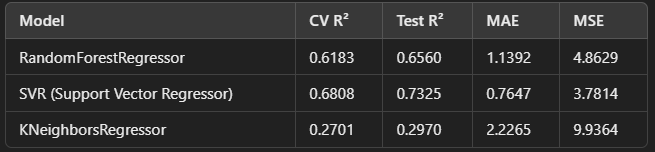
*   SVR adalah model terbaik berdasarkan metrik evaluasi, karena memiliki skor R² tertinggi dan error terendah
*   Model Random Forest cukup kompetitif, tetapi tidak sebaik SVR
*   Model K-Neighbors memiliki performa terburuk yang mungkin disebabkan oleh sensitivitasnya terhadap ukuran dataset atau distribusi data.







Menggunakan StandardScaler

In [117]:
results = {}
for model in classifiers:
    model_name = model.__class__.__name__
    print(f"\nTraining {model_name}...")

    # Cross-validation (5-fold)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

    # Menyesuaikan model dengan training set
    model.fit(X_train_scaled, y_train)

    # Prediksi
    y_pred = model.predict(X_test_scaled)

    # Metriks evaluasi
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Menyimpan hasil
    results[model_name] = {
        "CV R²": np.mean(cv_scores),
        "Test R²": r2,
        "MAE": mae,
        "MSE": mse
    }


Training RandomForestRegressor...

Training SVR...

Training KNeighborsRegressor...


In [118]:
# Menampilkan hasil
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Model: RandomForestRegressor
CV R²: 0.6143
Test R²: 0.6456
MAE: 1.1511
MSE: 5.0096

Model: SVR
CV R²: 0.6825
Test R²: 0.7324
MAE: 0.7682
MSE: 3.7823

Model: KNeighborsRegressor
CV R²: 0.4700
Test R²: 0.4988
MAE: 1.6828
MSE: 7.0843



> **Hasil Pengukuran**
* Proses ini mengubah data ke dalam bentuk distribusi normal dengan rata-rata 0 dan standar deviasi 1. Hal ini membantu algoritma tertentu seperti SVR dan KNeighborsRegressor, yang sensitif terhadap skala fitur
* 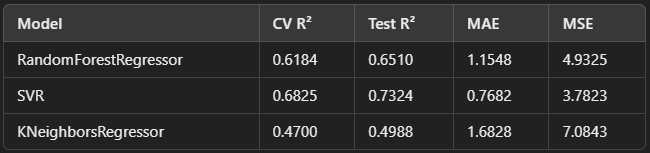  
* SVR adalah model terbaik dalam eksperimen ini, terutama karena sensitif terhadap data yang diskalakan dengan StandardScaler
*   Random Forest juga memberikan hasil yang cukup baik tetapi tidak seoptimal SVR.
*   KNeighborsRegressor tidak bekerja dengan baik dalam skenario ini, mungkin karena sifat dataset yang lebih cocok untuk model non-lokal atau kompleks.









> **Metriks Evaluasi**
* R² (Coefficient of Determination): Mengukur seberapa baik model menjelaskan variabilitas data target.
* MAE (Mean Absolute Error): Rata-rata kesalahan absolut antara prediksi dan data sebenarnya.
* MSE (Mean Squared Error): Rata-rata dari kuadrat kesalahan prediksi.





# Model Comparison

<ipython-input-119-4c861543bd77>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_data, palette='viridis')


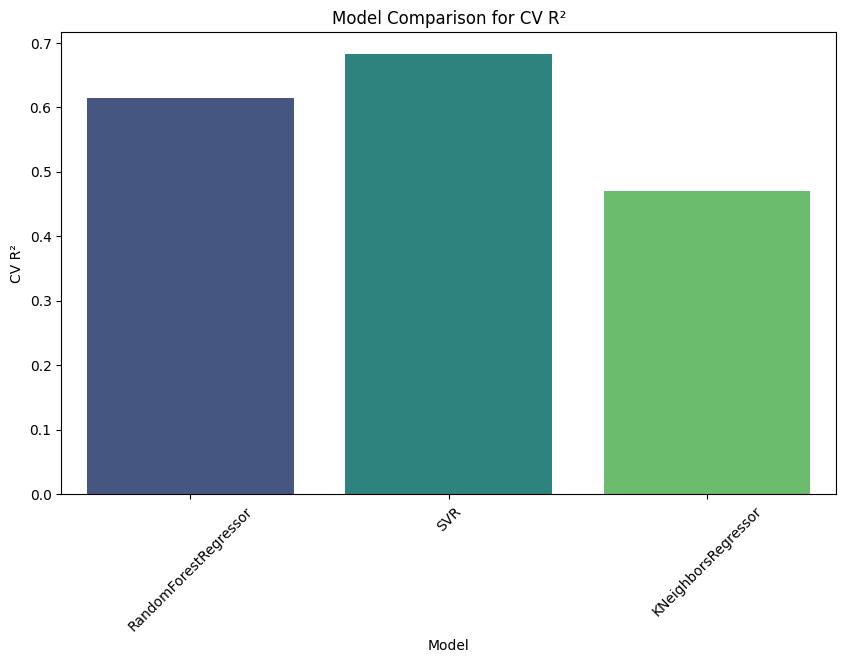

<ipython-input-119-4c861543bd77>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_data, palette='viridis')


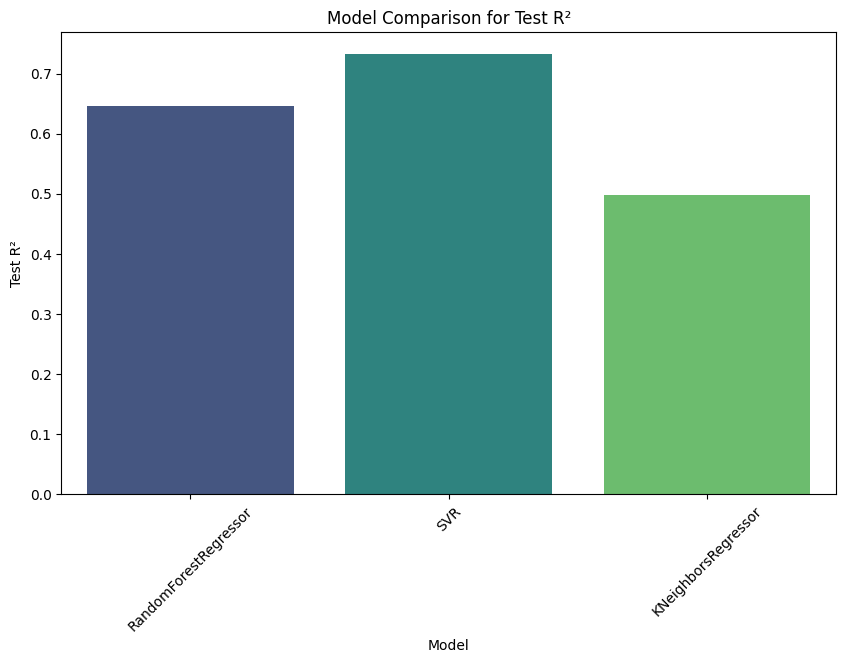

<ipython-input-119-4c861543bd77>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_data, palette='viridis')


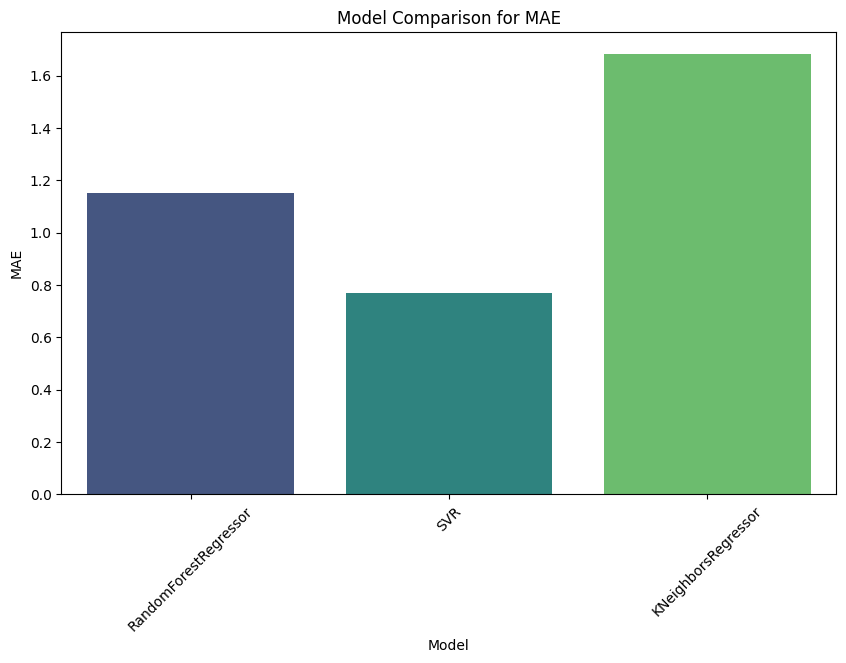

<ipython-input-119-4c861543bd77>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_data, palette='viridis')


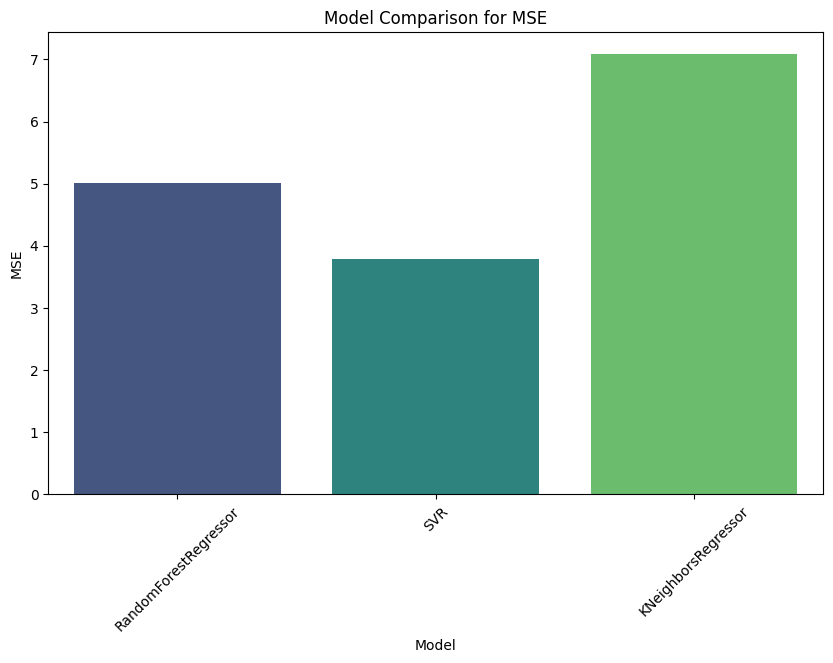

In [119]:
# Mengkonversi hasil ke pandas DataFrame
results_data = pd.DataFrame(results).T

# Mengubah index agar nama model sesuai dengan kolom
results_data = results_data.reset_index().rename(columns={'index': 'Model'})

# Memplot menggunakan Seaborn
metrics = ['CV R²', 'Test R²', 'MAE', 'MSE']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, data=results_data, palette='viridis')
    plt.title(f'Model Comparison for {metric}')
    plt.xticks(rotation=45)
    plt.show()

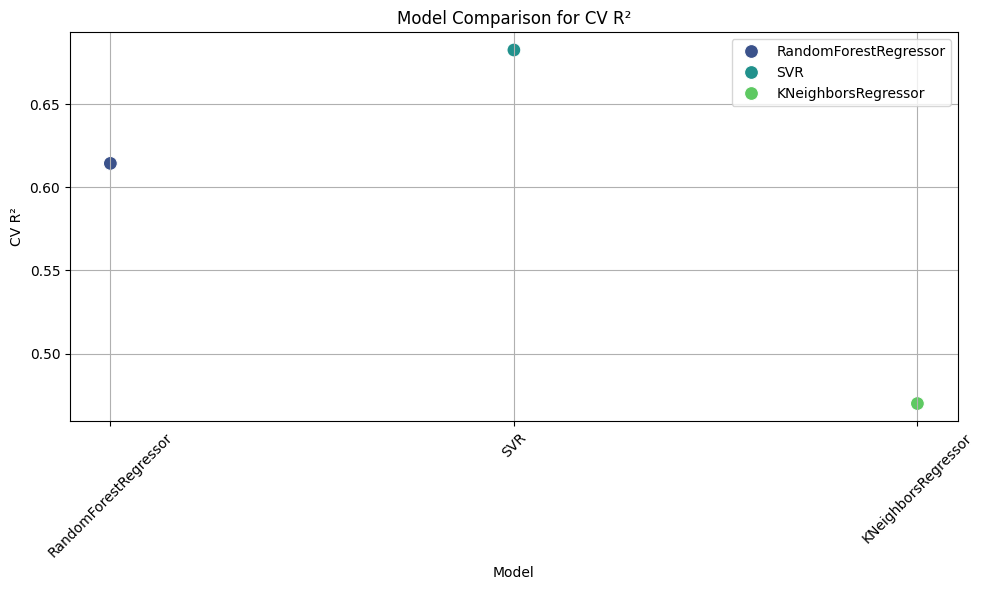

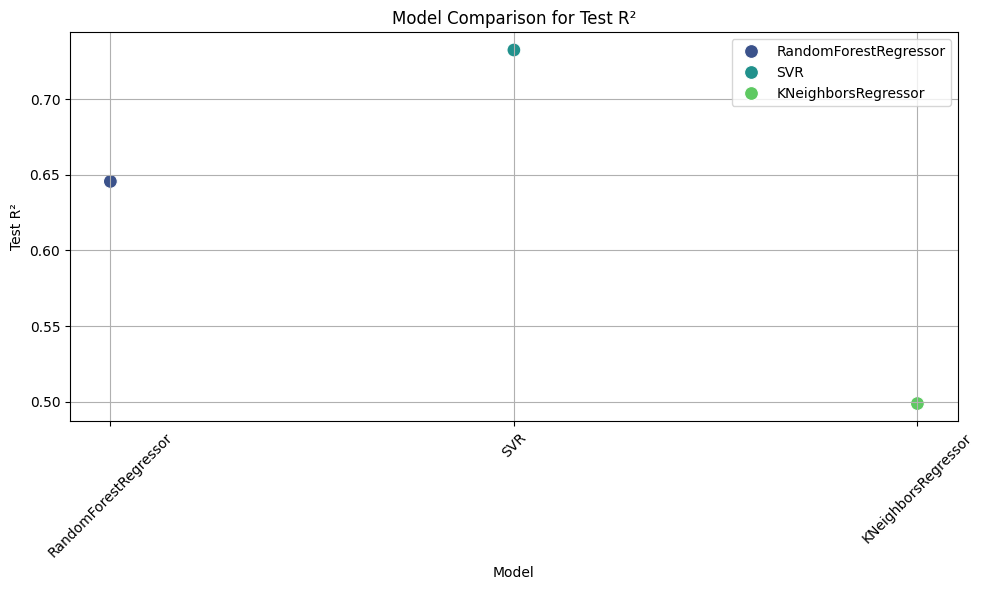

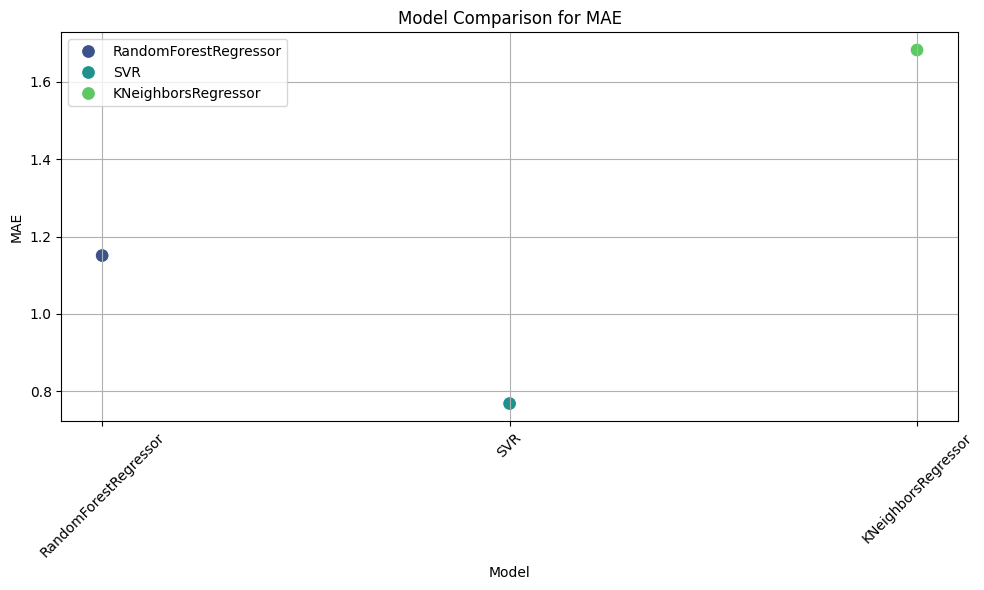

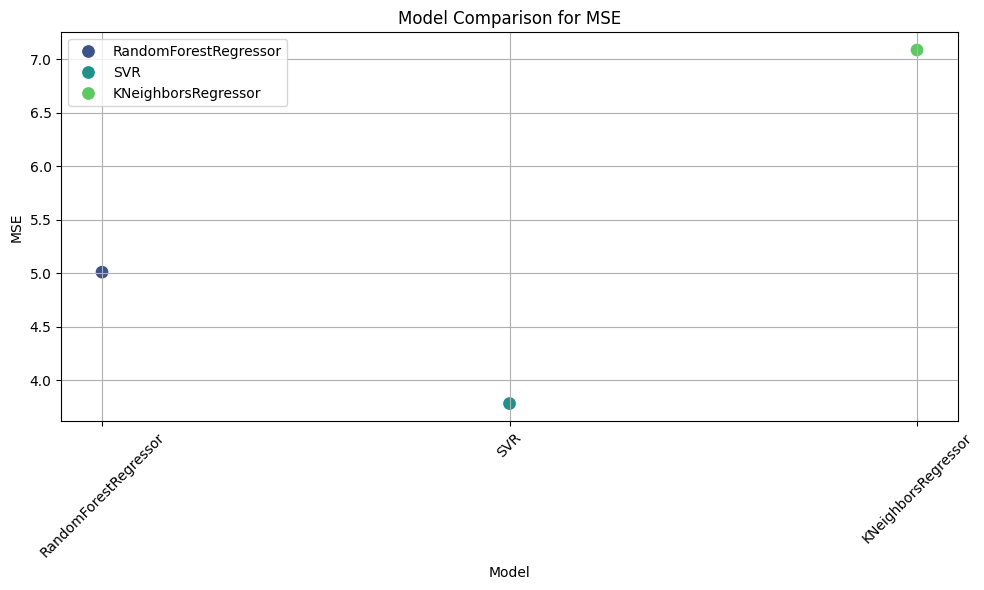

In [120]:
# Visualisasi data menggunakan ScatterPlot
metrics = ['CV R²', 'Test R²', 'MAE', 'MSE']
for metric in metrics:
    plt.figure(figsize=(10, 6))

    # Penggunaan ScatterPlot untuk setiap metriks
    sns.scatterplot(data=results_data, x='Model', y=metric, hue='Model', palette='viridis', s=100, marker='o')

    # Mengatur label title dan axis
    plt.title(f'Model Comparison for {metric}')
    plt.xticks(rotation=45)
    plt.ylabel(metric)

    # Kustomisasi legenda dan tata leta
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()

    # Menampilkan plot
    plt.show()

Feature Importance for RandomForestRegressor:


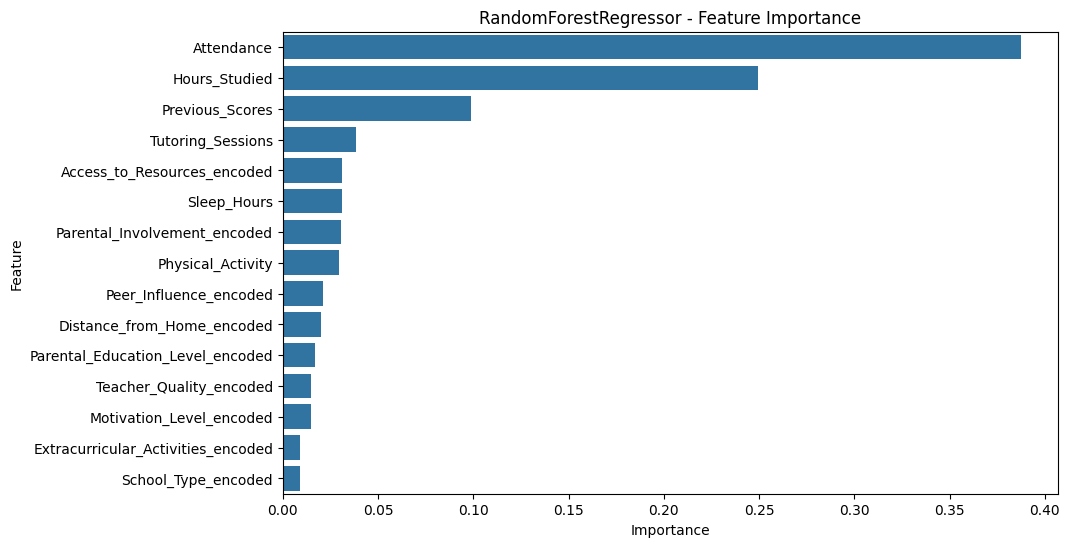

Feature Importance for SVR:


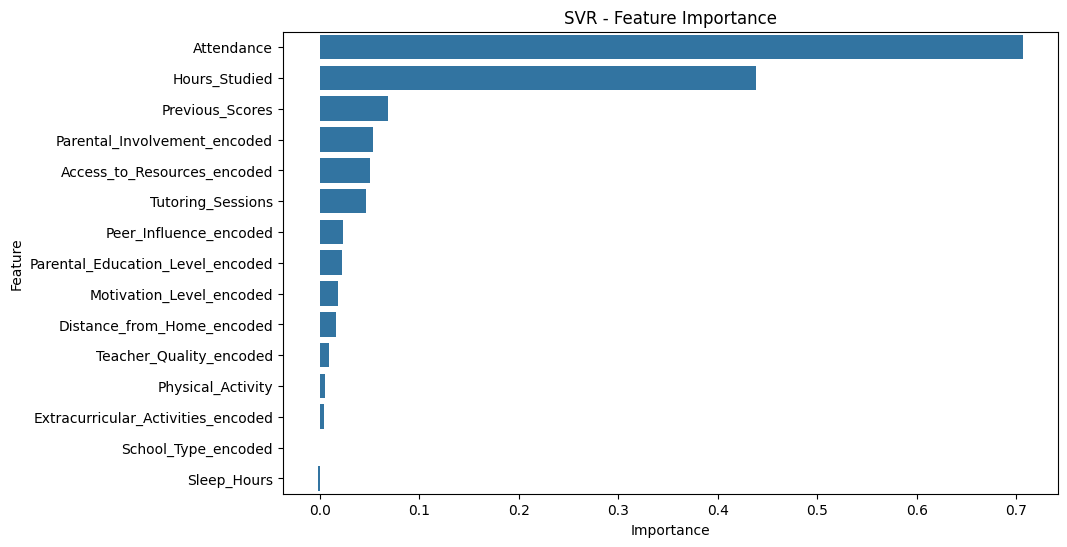

Feature Importance for KNeighborsRegressor:


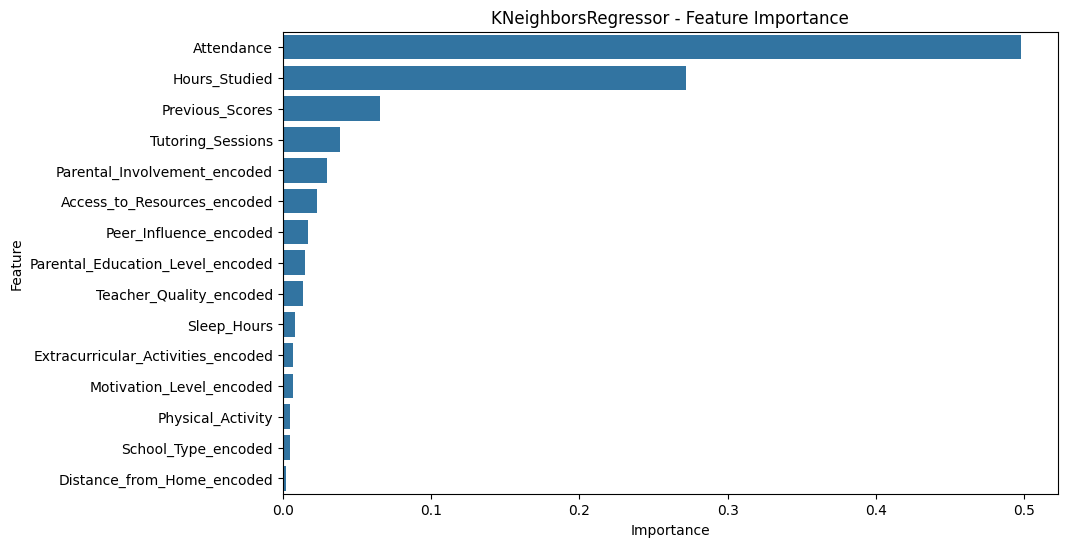

In [121]:
# Menambahkan library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Melakukan plotting untuk fitur penting
def plot_feature_importance(importances, feature_names, model_name):
    feature_importance_data = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_data)
    plt.title(f'{model_name} - Feature Importance')
    plt.show()

# Untuk model dengan fitur penting bawaan
def get_feature_importance_native(model, X, model_name):
    try:
        importances = model.feature_importances_
        plot_feature_importance(importances, X.columns, model_name)
    except AttributeError:
        print(f"{model_name} does not have native feature importance")

# Untuk model tanpa fitur penting bawaan
def get_permutation_importance(model, X_test, y_test, X, model_name):
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    importances = result.importances_mean
    plot_feature_importance(importances, X.columns, model_name)

# Analisis fitur penting untuk setiap model
for model in classifiers:
    model_name = model.__class__.__name__

    print(f"Feature Importance for {model_name}:")

    if hasattr(model, 'feature_importances_'):
        # Native feature importance (tree-based models like RandomForest)
        get_feature_importance_native(model, X_train, model_name)
    else:
        # Permutation importance for models like SVR and KNeighbors
        get_permutation_importance(model, X_test_scaled, y_test, X_train, model_name)

Extracting feature importance for RandomForestRegressor...
Extracting feature importance for SVR...
Extracting feature importance for KNeighborsRegressor...


<Figure size 1200x800 with 0 Axes>

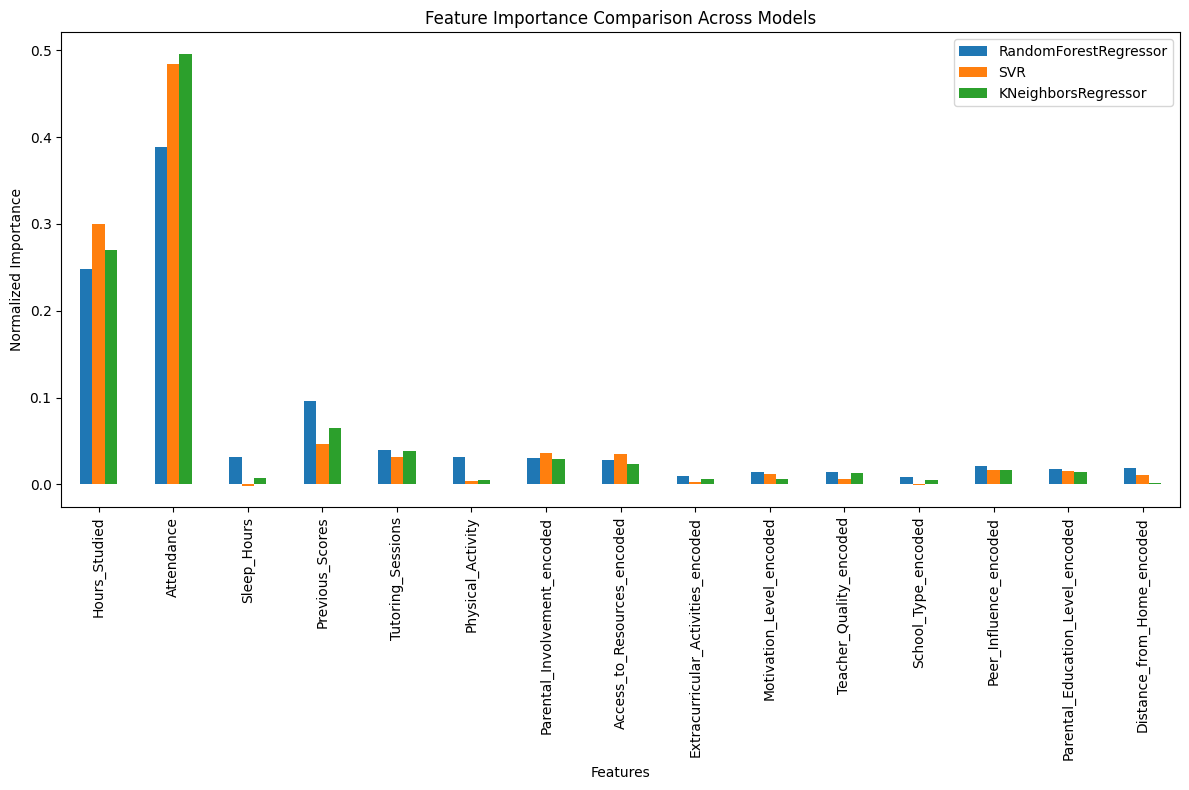

In [122]:
from sklearn.inspection import permutation_importance

# Normalisasi value yang penting
def normalize_importance(importances):
    return importances / np.sum(importances)

# Esktraksi fitur penting
def get_feature_importance(model, X_train, X_test, y_train, y_test, model_name):
    try:

        # Untuk model dengan fitur penting
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
        else:
            # Permutasi
            result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
            importances = result.importances_mean

        # Normalisasi fitur penting untuk perbandingan
        normalized_importances = normalize_importance(importances)
        return normalized_importances
    except Exception as e:
        print(f"Could not compute feature importance for {model_name}: {e}")
        return None

# Inisialisasi dictionary untuk menyimpan fitur penting dari setiap model
feature_importance_comparison = {}

# Melakukan perhitungan dan menyimpan fitur penting pada setiap model
for model in classifiers:
    model_name = model.__class__.__name__
    print(f"Extracting feature importance for {model_name}...")

    # Pelatihan model
    model.fit(X_train_scaled, y_train)

    # Mendapatkan value yang penting
    importances = get_feature_importance(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name)

    if importances is not None:
        feature_importance_comparison[model_name] = importances

# Membuat DataFrame untuk perbandingan
feature_importance_data = pd.DataFrame(feature_importance_comparison, index=X_train.columns)

# Pembagian perbandingan fitur penting dari setiap model
plt.figure(figsize=(12, 8))
feature_importance_data.plot(kind='bar', figsize=(12, 8))
plt.title("Feature Importance Comparison Across Models")
plt.xlabel("Features")
plt.ylabel("Normalized Importance")
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Kesimpulan

Dengan ini didapatkan beberapa kesimpulan sebagai berikut :

*   Super Vector Regressor menjadi model terbaik berdasarkan performa pengujian pada metriks R², MAE, dan MSE

> **Mengapa SVR menjadi model terbaik?**
*   R² Tertinggi (0.7355): SVR mampu menjelaskan variansi terbesar dalam variabel target (nilai Exam_Score), menunjukkan model ini paling baik dalam memprediksi hasil secara keseluruhan.
* MAE Terendah (0.7440):
SVR menghasilkan kesalahan absolut rata-rata terkecil, yang berarti prediksi model lebih dekat dengan nilai sebenarnya dibandingkan model lainnya.
* MSE Terendah (3.7384):
Kesalahan kuadrat rata-rata terkecil menunjukkan generalisasi yang lebih baik dan tingkat kesalahan yang lebih rendah dibandingkan model lainnya.VR

> **Fitur Terbaik**
*   Hours_Studied dan Attendance merupakan dua fitur yang konsisten dianggap paling penting dalam semua model yang digunakan. Skor kepentingannya yang tinggi (berdasarkan normalisasi) menunjukkan bahwa kedua fitur ini memiliki hubungan yang sangat kuat dengan variabel target, yaitu performa siswa

> **Fitur Terendah**
* Fitur seperti Sleep_Hours (Jam Tidur), Tutoring_Sessions (Sesi Bimbingan Belajar), dan Previous_Scores (Nilai Sebelumnya) menunjukkan tingkat kepentingan yang sedang dalam model RandomForest. Namun, fitur-fitur ini kurang menonjol dalam model linear.
* Fitur lainnya, seperti Physical_Activity (Aktivitas Fisik), Motivation_Level_encoded (Tingkat Motivasi), Parental_Involvement_encoded (Keterlibatan Orang Tua), dan Internet_Access_encoded (Akses Internet), memberikan kontribusi yang sangat kecil dalam model. Hal ini menunjukkan bahwa fitur-fitur tersebut mungkin memiliki dampak yang terbatas dalam memprediksi hasil (misalnya, kinerja akademik).



# Saving Model

In [123]:
import joblib

# Menyimpan model
joblib.dump(model, 'best_svr_model.joblib')

['best_svr_model.joblib']

In [124]:
# Memuat model yang sebelumnya telah disimpan
loaded_model = joblib.load('best_svr_model.joblib')
print(type(loaded_model))

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>


In [125]:
# Pelatihan model
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Menyimpan model
joblib.dump(model, 'best_svr_model.joblib')

['best_svr_model.joblib']

In [126]:
loaded_model = joblib.load('best_svr_model.joblib')

# Memastikan pengujian terbntuk dengan benar dan merupakan numerik
predictions = loaded_model.predict(X_test)

In [127]:
# Melakukan prediksi
predictions

array([64.61089742, 65.35993812, 70.64784435, ..., 65.36195503,
       63.79533118, 71.16830751])



# Save to CSV file



In [128]:
# Membuat DataFrame untuk prediksi
predictions_data = pd.DataFrame({
    'ID': X_test.index,  # Opsional, dapat dipakai jika ingin menggunakan indeks DataFrame
    'Predictions': predictions
})

In [129]:
# Menyimpan file dalam format CSV
predictions_data.to_csv('predictions.csv', index=False)

In [130]:
from IPython.display import FileLink

# Menyediakan link untuk download file CSV
FileLink('predictions.csv')

/content/predictions.csv